## 1. Import Relevant Packages

In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import *
from scipy import stats
import datetime as dt
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_theme(style='white', color_codes=True, palette='Blues_r')
plt.rcParams["font.family"] = "Times New Roman"

import statsmodels.api as sm
from scipy.stats import pearsonr
from statsmodels.regression.rolling import RollingOLS

In [2]:
# Loading Pyfolio for results

import pyfolio as pf
%matplotlib inline
import empyrical

# silence warnings
import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
# Define start and end periods for results
start = '1976-01-01'
end = '2020-12-31'

## 2. Importing risk free rate

In [4]:
# Import
risk_free = pd.read_csv('risk_free_1931.csv', low_memory=False, index_col=0)
risk_free.index = pd.to_datetime(risk_free.index).tz_convert('UTC')
risk_free

RF
date                              
1931-01-02 00:00:00+00:00  0.00006
1931-01-03 00:00:00+00:00  0.00006
1931-01-05 00:00:00+00:00  0.00006
1931-01-06 00:00:00+00:00  0.00006
1931-01-07 00:00:00+00:00  0.00006
...                            ...
2020-12-24 00:00:00+00:00  0.00000
2020-12-28 00:00:00+00:00  0.00000
2020-12-29 00:00:00+00:00  0.00000
2020-12-30 00:00:00+00:00  0.00000
2020-12-31 00:00:00+00:00  0.00000

[23561 rows x 1 columns]

In [5]:
# Define start and end date
risk_free = risk_free[risk_free.index >= start]
risk_free = risk_free[risk_free.index <= end]

In [6]:
risk_free = risk_free['RF']

## 3. Importing benchmark data - Market

In [7]:
# Import
market = pd.read_csv('market_benchmark_1931.csv', low_memory=False, index_col=0)
market.index = pd.to_datetime(market.index).tz_convert('UTC')
market

Mkt
date                              
1931-01-02 00:00:00+00:00  0.03496
1931-01-03 00:00:00+00:00  0.01826
1931-01-05 00:00:00+00:00 -0.00794
1931-01-06 00:00:00+00:00  0.01516
1931-01-07 00:00:00+00:00  0.00056
...                            ...
2020-12-24 00:00:00+00:00  0.00210
2020-12-28 00:00:00+00:00  0.00460
2020-12-29 00:00:00+00:00 -0.00400
2020-12-30 00:00:00+00:00  0.00270
2020-12-31 00:00:00+00:00  0.00390

[23561 rows x 1 columns]

In [8]:
# Define start and end date
market = market[market.index >= start]
market = market[market.index <= end]

In [9]:
# Rename columns
market.rename(columns={"Mkt": "market"}, inplace=True)

In [10]:
# Sort values in asccending order
market.sort_values('market', ascending=True)

market
date                              
1987-10-19 00:00:00+00:00 -0.17413
2020-03-16 00:00:00+00:00 -0.11994
2020-03-12 00:00:00+00:00 -0.09624
2008-12-01 00:00:00+00:00 -0.08950
2008-10-15 00:00:00+00:00 -0.08776
...                            ...
1987-10-21 00:00:00+00:00  0.08597
2020-03-13 00:00:00+00:00  0.08966
2020-03-24 00:00:00+00:00  0.09346
2008-10-28 00:00:00+00:00  0.09774
2008-10-13 00:00:00+00:00  0.11354

[11350 rows x 1 columns]

In [11]:
market = market['market']

In [12]:
# Define excess market retun
excess_market = market - risk_free

In [13]:
excess_market

date
1976-01-02 00:00:00+00:00    0.0079
1976-01-05 00:00:00+00:00    0.0178
1976-01-06 00:00:00+00:00    0.0120
1976-01-07 00:00:00+00:00    0.0052
1976-01-08 00:00:00+00:00    0.0068
                              ...  
2020-12-24 00:00:00+00:00    0.0021
2020-12-28 00:00:00+00:00    0.0046
2020-12-29 00:00:00+00:00   -0.0040
2020-12-30 00:00:00+00:00    0.0027
2020-12-31 00:00:00+00:00    0.0039
Length: 11350, dtype: float64

## 4. Momentum results

**Importing momentum data**

In [14]:
# Import values
mom_results = pd.read_csv('MOM_1931.csv', low_memory=False, index_col=0)
mom_results.index = pd.to_datetime(mom_results.index).tz_localize('UTC')

In [15]:
# Sort values in ascending order
mom_results.sort_values('long_short', ascending=True)

long_short
daily_date                           
1939-09-05 00:00:00+00:00   -0.215019
2020-11-09 00:00:00+00:00   -0.206343
2001-01-03 00:00:00+00:00   -0.145719
2000-04-03 00:00:00+00:00   -0.131301
2000-03-15 00:00:00+00:00   -0.127198
...                               ...
2000-06-02 00:00:00+00:00    0.081195
1933-07-24 00:00:00+00:00    0.084156
2009-03-30 00:00:00+00:00    0.089446
2000-05-30 00:00:00+00:00    0.104294
2000-04-17 00:00:00+00:00    0.114936

[23561 rows x 1 columns]

In [16]:
# Define start and end date
mom_results = mom_results[mom_results.index >= start]
mom_results = mom_results[mom_results.index <= end]

In [17]:
mom_results = mom_results.rename(columns={'long_short':'MOM strategy'})

In [18]:
mom_results = mom_results['MOM strategy']

In [19]:
# Make non-excess returns
mom_results_ret = mom_results+ risk_free

**Momentum Results**

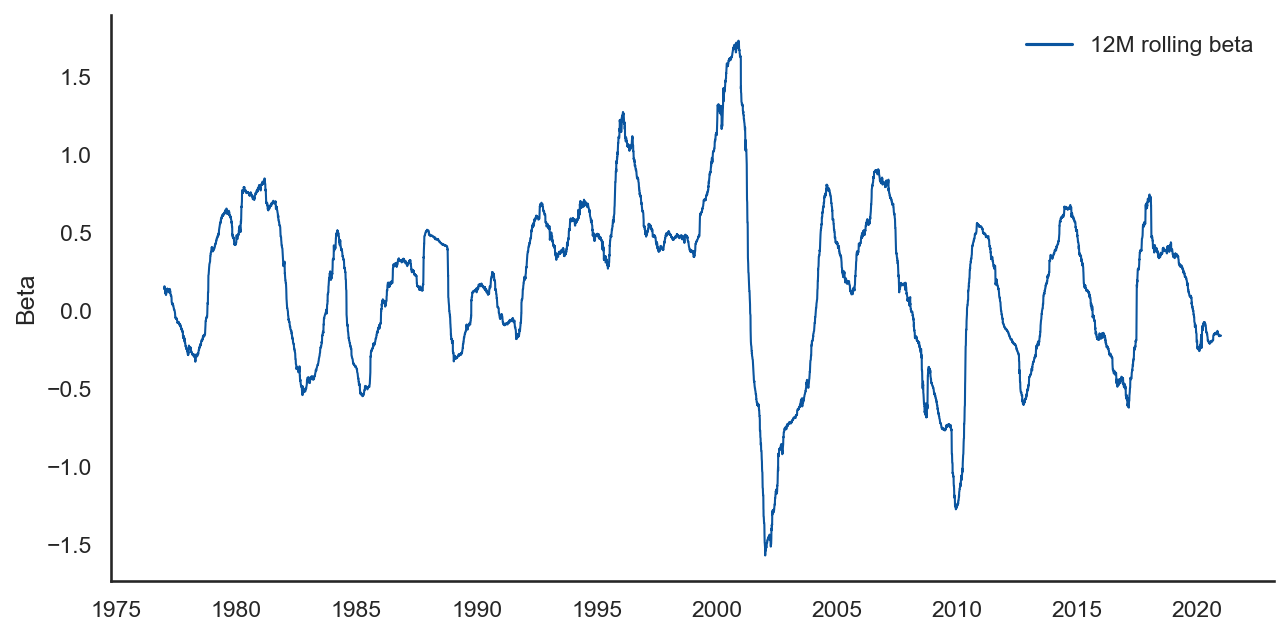

In [20]:
# Estimating rolling beta 12M
y=mom_results
X=sm.add_constant(excess_market)
rols = RollingOLS(y, X, window=252, min_nobs=252) #don't include NaN values
res_12M = rols.fit()
res_12M.params

# Plotting rolling betas
plt.figure(figsize=(10,5), dpi=150)
ax = plt.gca()
plt.plot(res_12M.params[0], label="12M rolling beta")
plt.legend(loc="upper right", edgecolor='white')
plt.ylabel('Beta', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for line in ax.get_lines():
    line.set_linewidth(1)

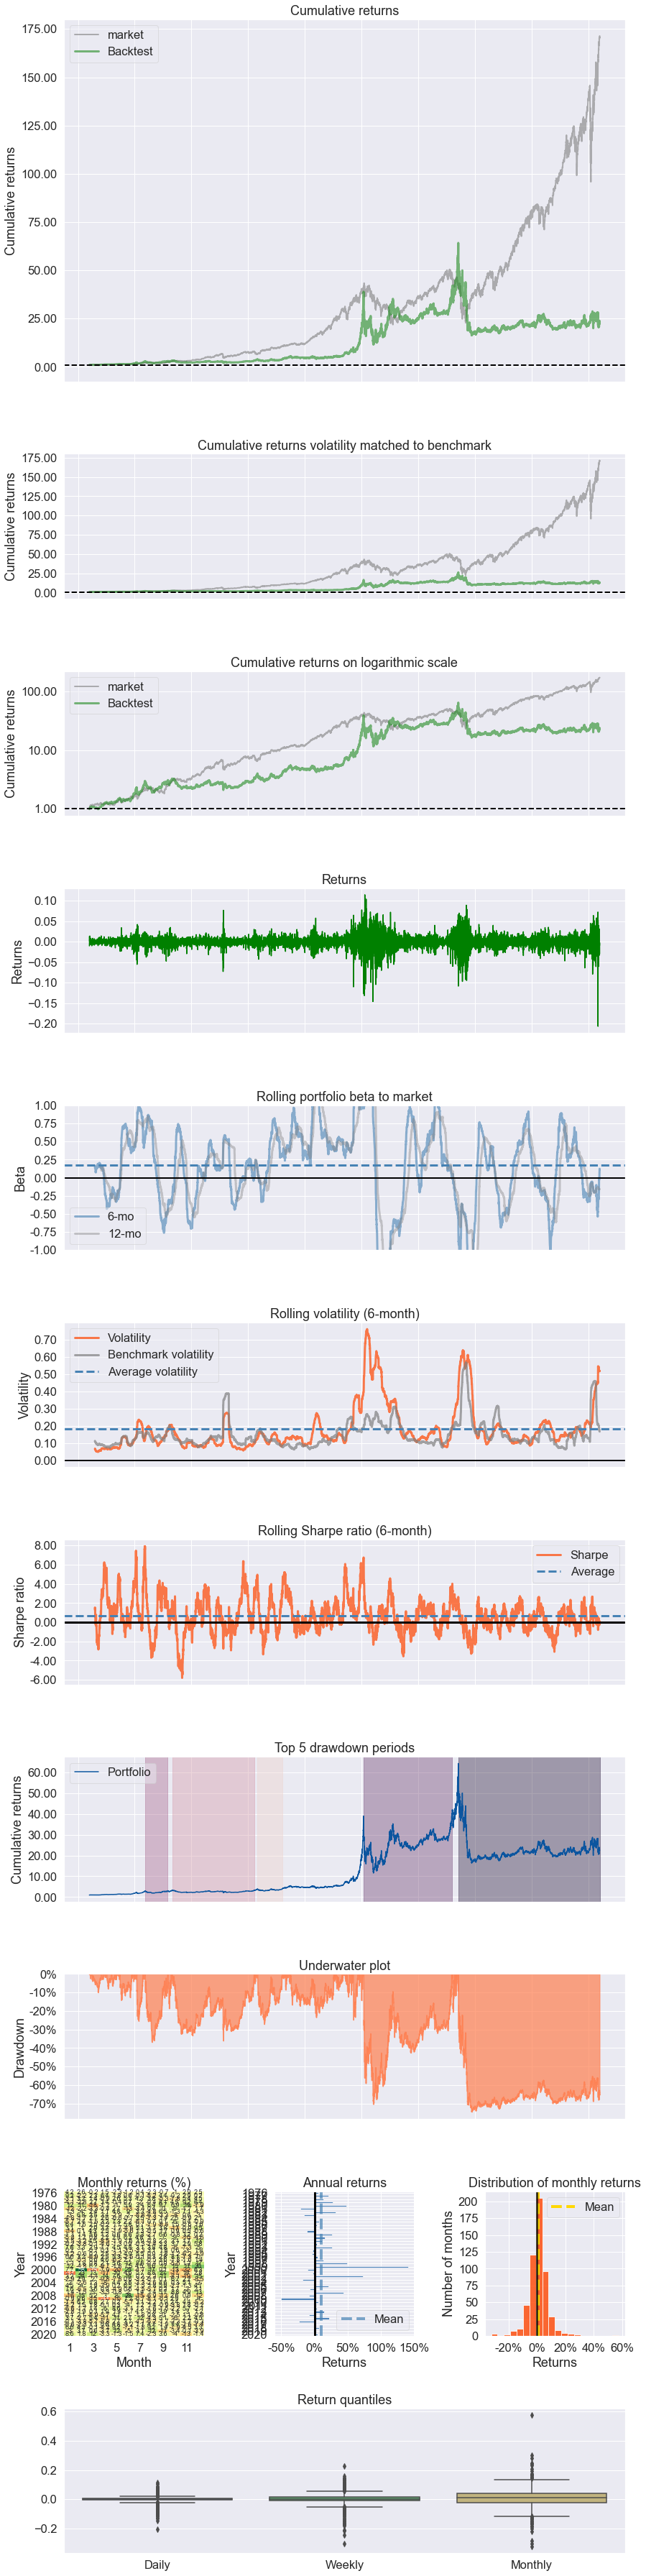

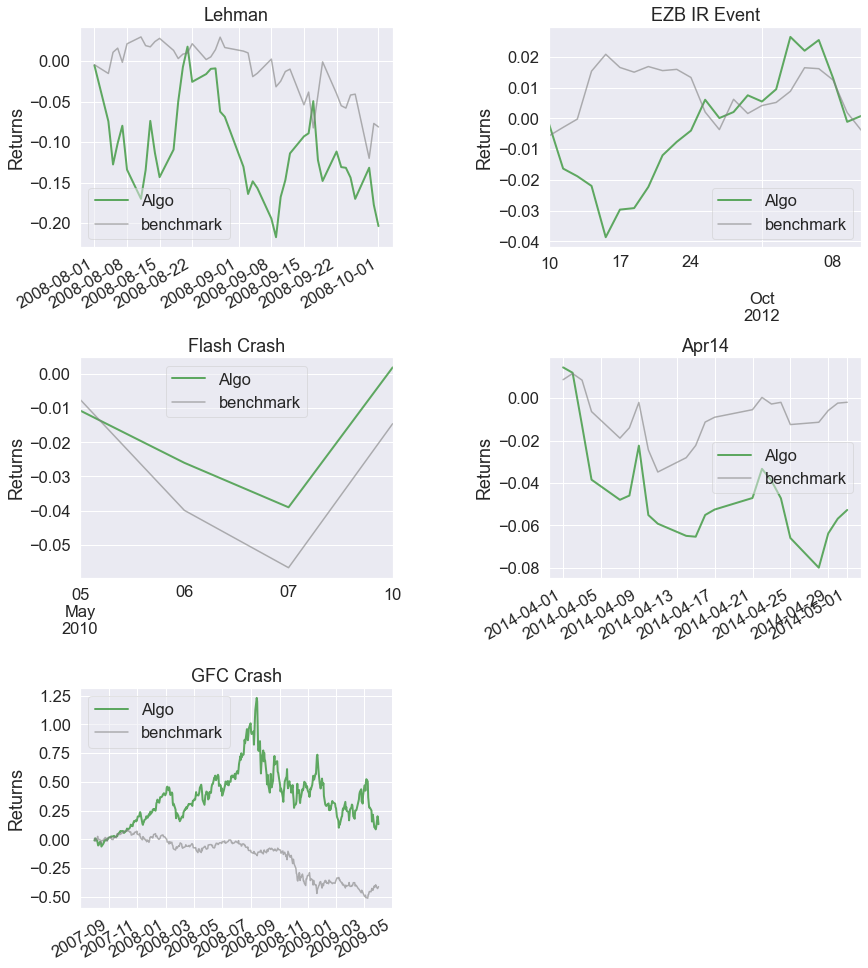

In [21]:
# Get overview
pf.create_full_tear_sheet(mom_results, benchmark_rets=market)

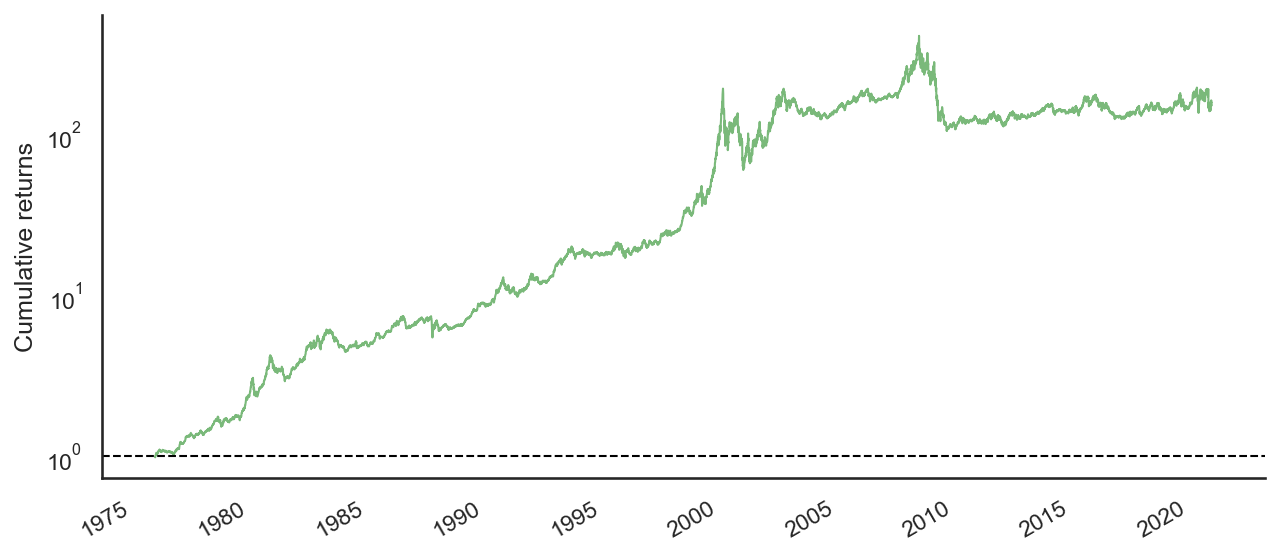

In [22]:
# Cumulative Returns
# Note we use returns here, not excess returns

plt.figure(figsize=(10, 10), dpi=150)

plt.subplot(2,1,1)
ax = plt.gca()
pf.plotting.plot_rolling_returns(mom_results_ret, kind='line')
ax.set_yscale('log')
plt.legend('', edgecolor='white',facecolor='white',  loc = 'upper left',)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel("Cumulative returns")
plt.xlabel("")

for line in ax.get_lines():
    line.set_linewidth(1)

No handles with labels found to put in legend.


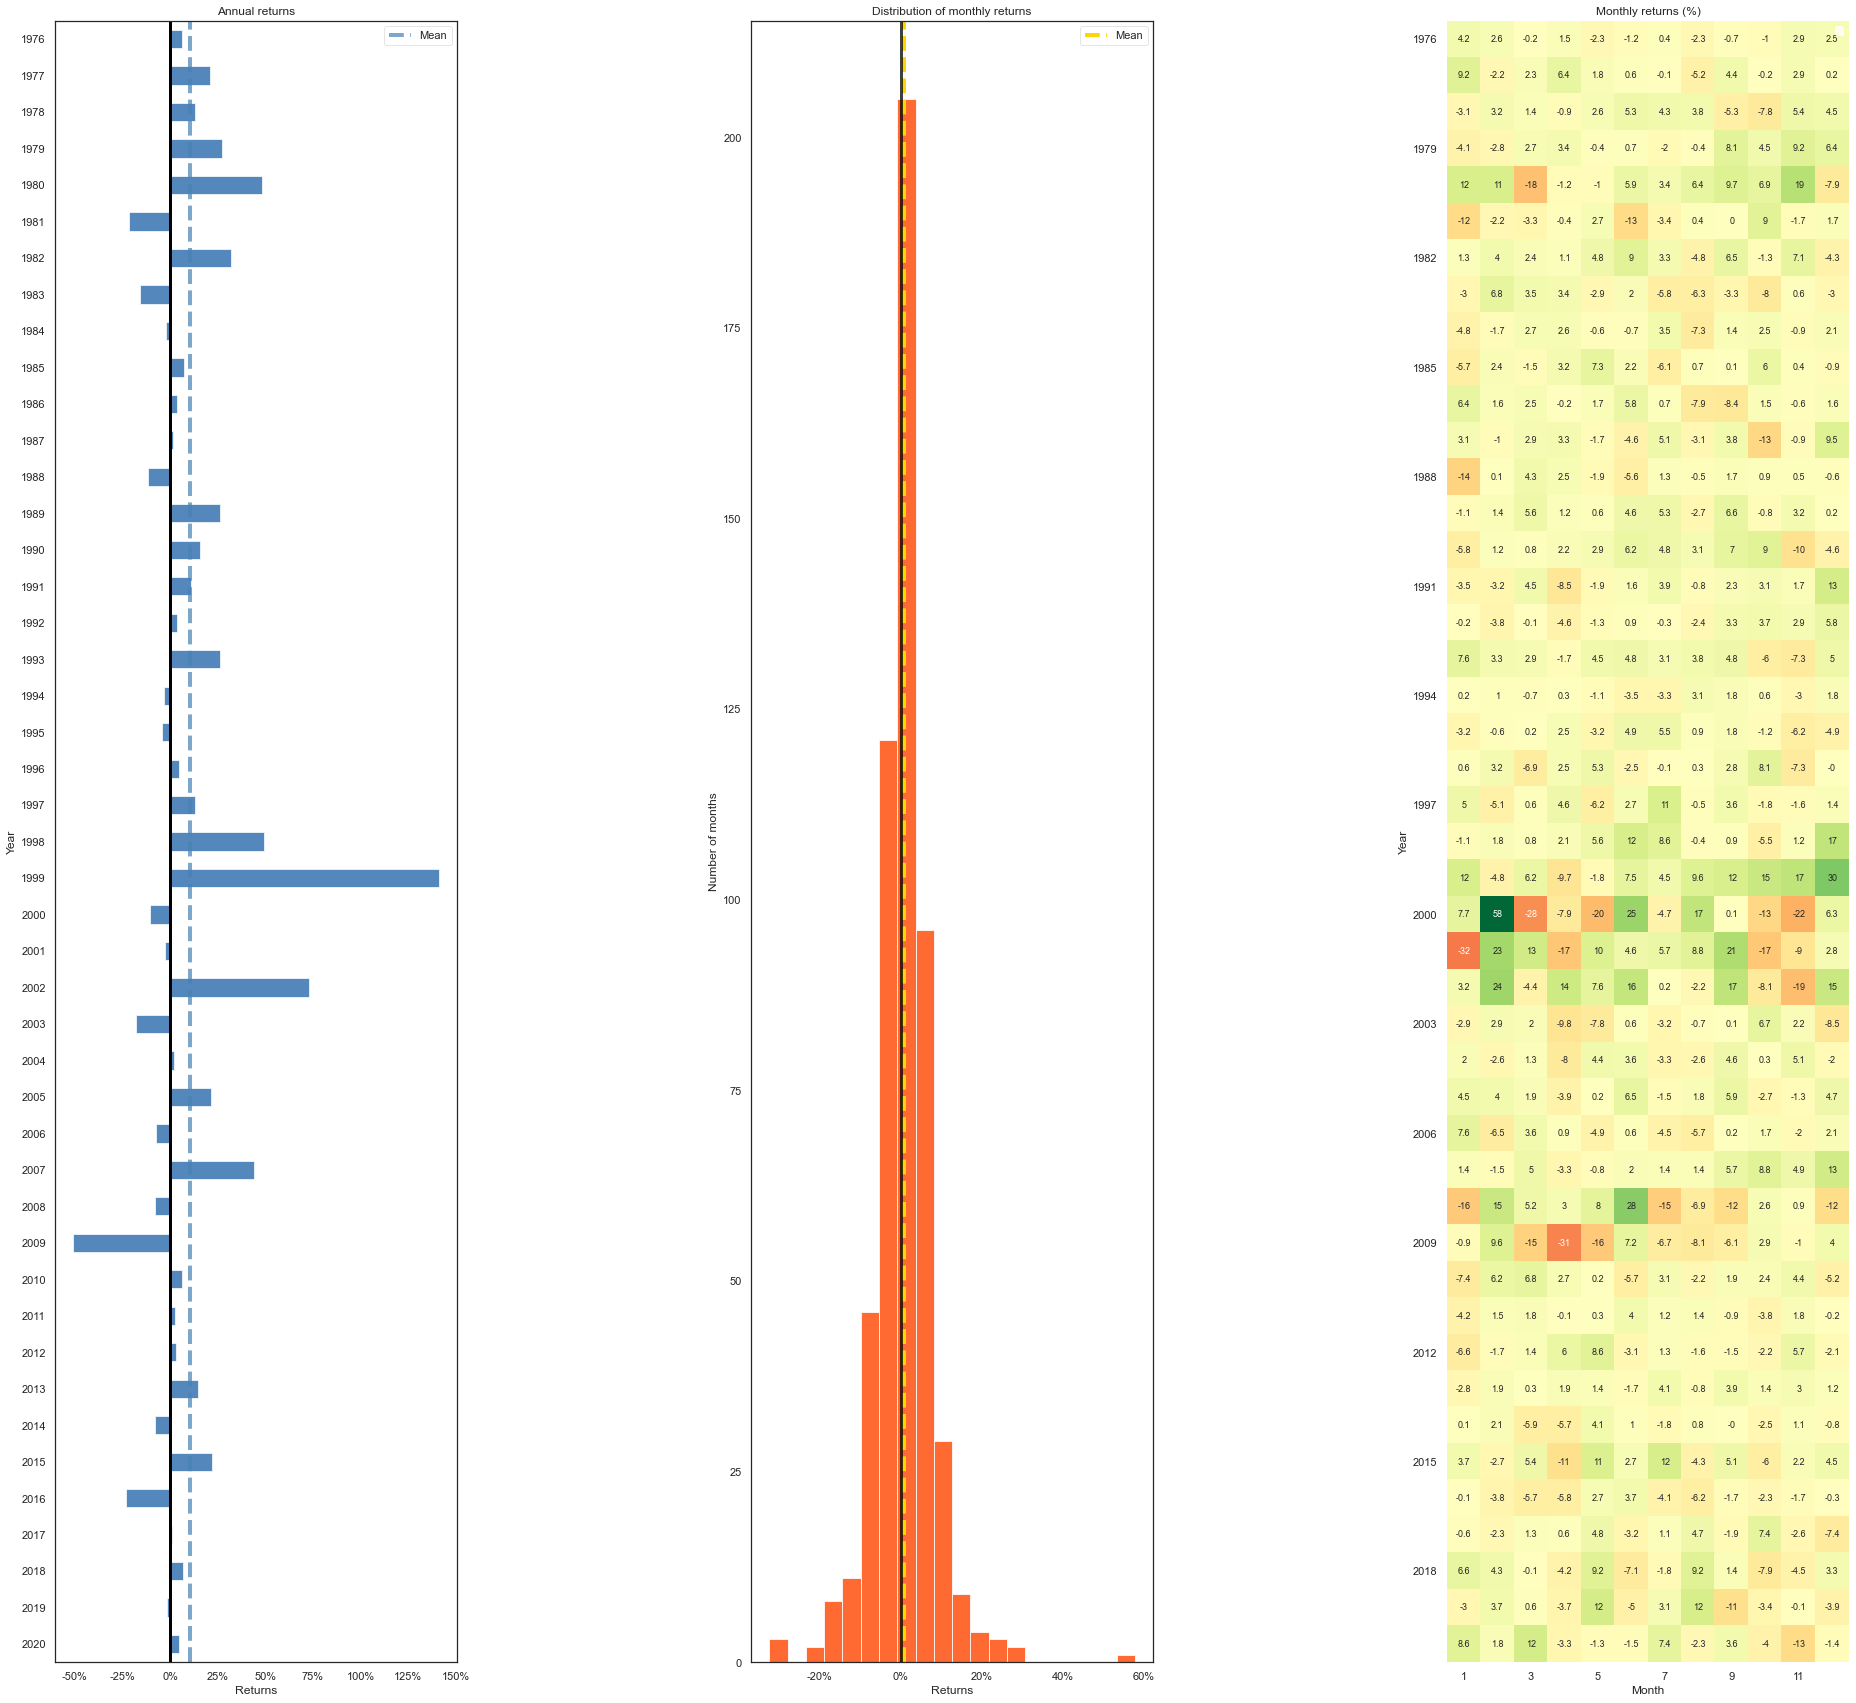

In [23]:
# Overview of monthly returns
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(mom_results)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(mom_results)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(mom_results)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')
plt.tight_layout()
fig.set_size_inches(30,30)

No handles with labels found to put in legend.


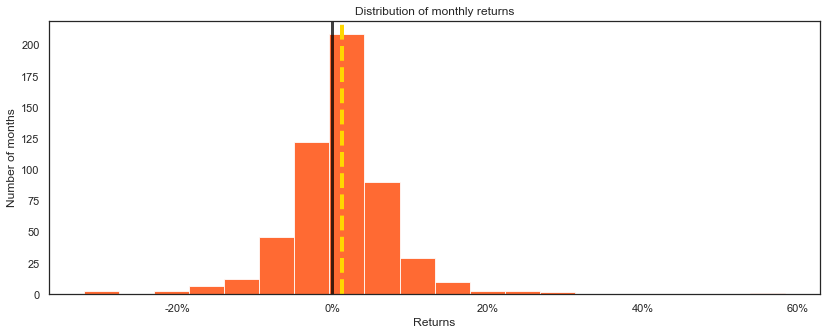

In [24]:
# Distribution of returns
# Note we use returns here, not excess returns

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_monthly_returns_dist(mom_results_ret)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')
plt.tight_layout()
#plt.Color = 'g';
fig.set_size_inches(40,5)

No handles with labels found to put in legend.


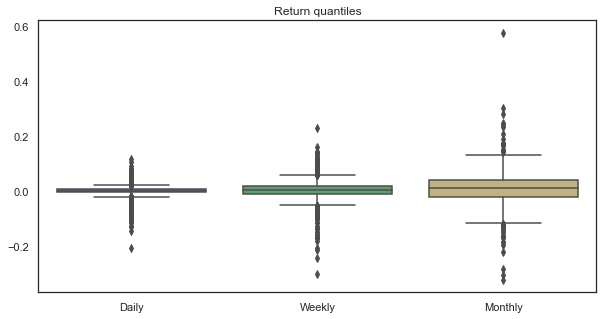

In [25]:
# Return quantiles
plt.figure(figsize=(10,5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')
pf.plot_return_quantiles(mom_results);

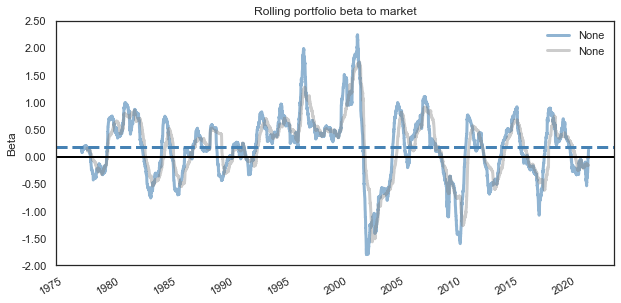

In [26]:
# Rolling beta
plt.figure(figsize=(10,5))
pf.plot_rolling_beta(mom_results, market);
plt.ylim([-2, 2.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')

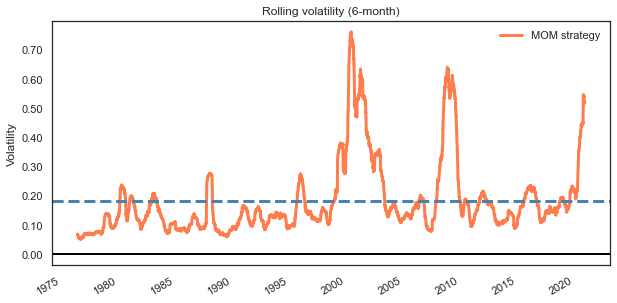

In [27]:
# Rolling volatility
plt.figure(figsize=(10,5))
pf.plot_rolling_volatility(mom_results);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')

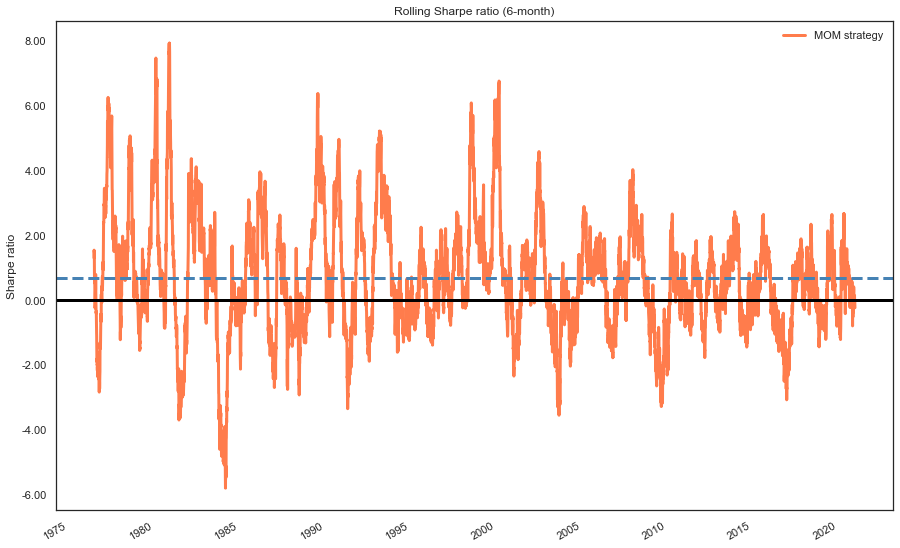

In [28]:
# Rolling sharpe ratio
plt.figure(figsize=(15,10))
pf.plot_rolling_sharpe(mom_results);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')

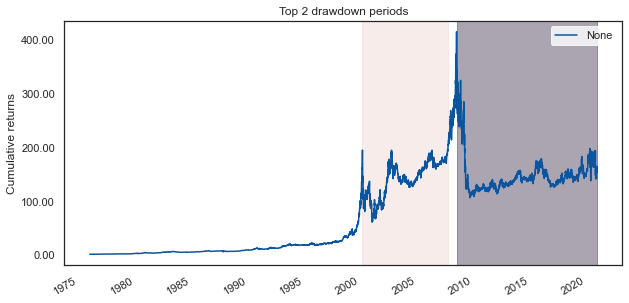

In [29]:
# Drawdown
plt.figure(figsize=(10,5))
pf.plot_drawdown_periods(mom_results_ret);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')

Text(0.5, 0, '')

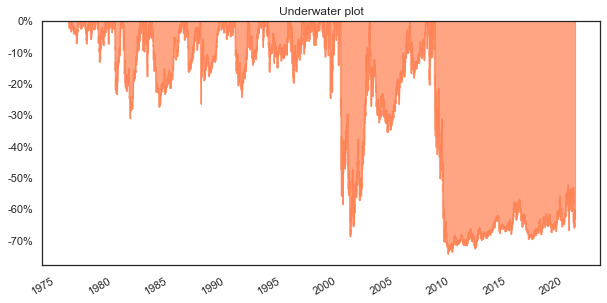

In [30]:
# Drawdown: Underwater plot
plt.figure(figsize=(10,5))
pf.plot_drawdown_underwater(mom_results_ret);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend("", edgecolor='white',facecolor='white')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel("")
plt.xlabel("")

In [31]:
print("The Annual Exc. Return of the MOM is: ", empyrical.annual_return(mom_results)*100)
print('MOM T-stat excess returns:', stats.ttest_1samp(mom_results, 0.0))
print("The Volatility of the MOM is: ", empyrical.annual_volatility(mom_results)*100)
print("The alpha of the MOM is: ", empyrical.alpha(mom_results,excess_market)*100)
print("The Beta of the MOM is: ", empyrical.beta(mom_results,excess_market))
print("The Sharpe of the MOM is: ", empyrical.sharpe_ratio(mom_results))
print("The Sortino of the MOM is: ", empyrical.sortino_ratio(mom_results))
print("MD of the MOM is: ", empyrical.max_drawdown(mom_results_ret)*100)

The Annual Exc. Return of the MOM is:  7.136548265755471
MOM T-stat excess returns: Ttest_1sampResult(statistic=2.8147712762313133, pvalue=0.004889602488269303)
The Volatility of the MOM is:  22.585153619029192
The alpha of the MOM is:  10.088831613806093
The Beta of the MOM is:  -0.016387041106928617
The Sharpe of the MOM is:  0.41941644051827937
The Sortino of the MOM is:  0.5699520560343027
MD of the MOM is:  -74.34091458877944


In [32]:
# Testing estimated alpha and beta
y=mom_results
X=sm.add_constant(excess_market)
model = sm.OLS(y, X)
results = model.fit()
params = results.params

# Print beta, alpha and t-stats
print('Beta:', params[0])
print('Alpha:', params['const']*252)
print('')
print(results.t_test([2, 0]))

Beta: -0.016387041106928388
Alpha: 0.0961357468301431

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0008      0.000      2.855      0.004       0.000       0.001


In [33]:
mom_monthly = empyrical.stats.aggregate_returns(mom_results_ret,'monthly')

In [34]:
mom_monthly_df = pd.DataFrame()
mom_monthly_df['ret'] = mom_monthly

In [35]:
# NOTE: This is not excess returns
(mom_monthly_df.sort_values('ret')*100).head(10)

ret
2001 1  -32.041064
2009 4  -30.566734
2000 3  -28.097408
     11 -21.854487
     5  -19.458929
2002 11 -18.679697
1980 3  -17.486177
2001 4  -16.846066
     10 -16.660286
2009 5  -16.352077

In [36]:
# NOTE: This is not based on excess returns
scipy.stats.skew(mom_results_ret)

-1.0090687541613443

In [37]:
mom_monthly_df['1+ret'] = mom_monthly_df['ret']+1 
mom_monthly_df['cum_ret'] = mom_monthly_df['1+ret'].cumprod()

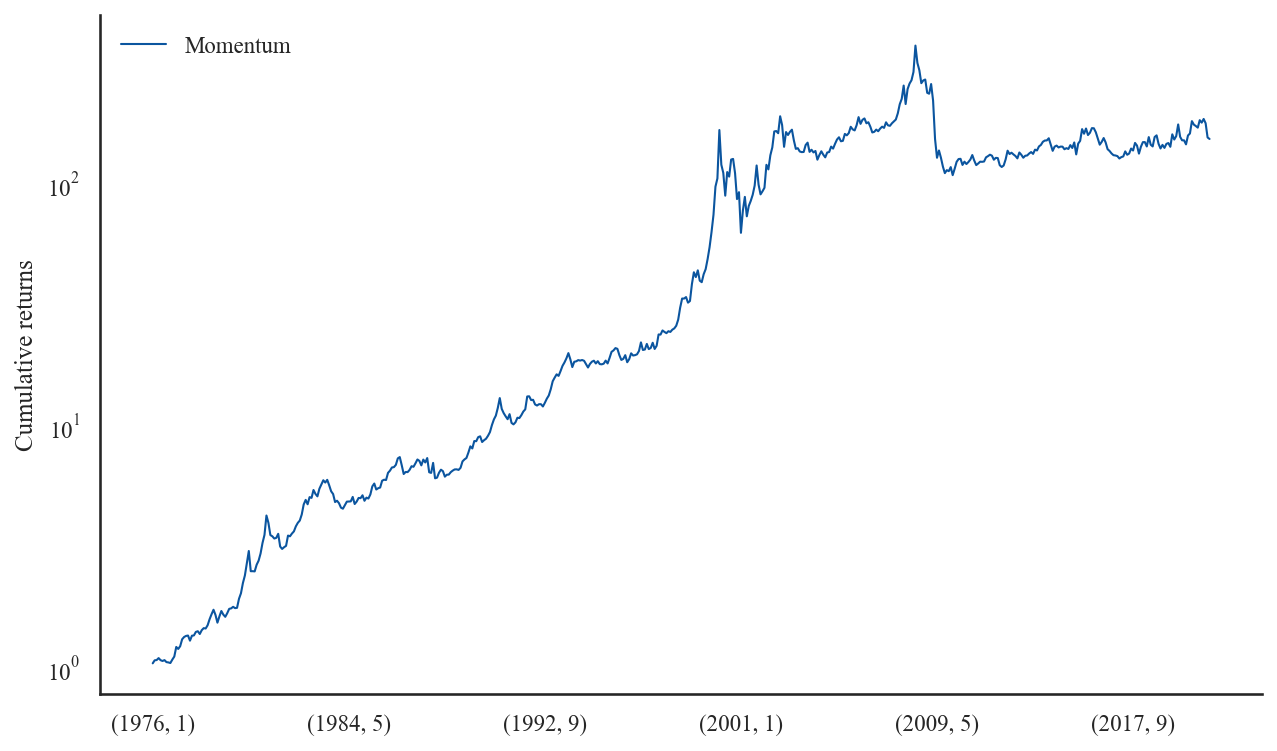

In [38]:
# Cumulative return
import matplotlib.dates as mdates
from matplotlib.pyplot import figure

plt.rcParams["font.family"] = "Times New Roman"

figure(figsize=(10, 6), dpi=150)
ax = plt.gca()
mom_monthly_df.plot(kind='line', y='cum_ret', linewidth=1, ax=ax)
plt.ylabel("Cumulative returns")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log') 
plt.legend(['Momentum'], loc = 'upper left', edgecolor='white',facecolor='white')

## 5. Random Forest

**Importing Random Forest data**

In [41]:
# Import values
rf_results = pd.read_csv('rf_results.csv', low_memory=False, index_col=0)
rf_results.index = pd.to_datetime(rf_results.index).tz_localize('UTC')

In [42]:
# Sort values in ascending order
rf_results.sort_values('long_short', ascending=True)

long_short
daily_date                           
2000-04-03 00:00:00+00:00   -0.128026
2000-03-15 00:00:00+00:00   -0.114369
2000-04-10 00:00:00+00:00   -0.111112
2000-04-12 00:00:00+00:00   -0.106309
1999-04-19 00:00:00+00:00   -0.102628
...                               ...
2000-04-18 00:00:00+00:00    0.094709
2000-05-30 00:00:00+00:00    0.109195
2000-06-02 00:00:00+00:00    0.113250
2000-12-05 00:00:00+00:00    0.123610
2001-01-03 00:00:00+00:00    0.134683

[11350 rows x 1 columns]

In [43]:
# Define start and end date
rf_results = rf_results[rf_results.index >= start]
rf_results = rf_results[rf_results.index <= end]

In [44]:
rf_results = rf_results.rename(columns={'long_short':'Random Forest'})

In [45]:
rf_results = rf_results['Random Forest']

In [46]:
# Make non-excess returns
rf_results_ret = rf_results + risk_free

**Random Forest Results**

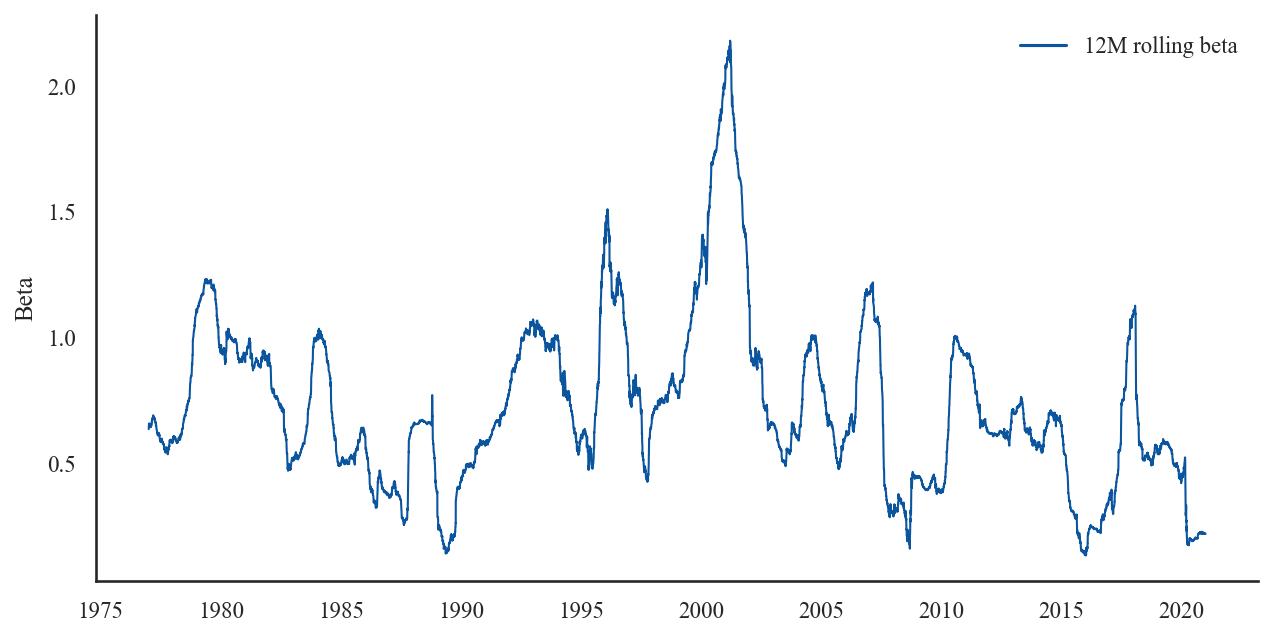

In [47]:
# Estimating rolling beta 12M
y=rf_results
X=sm.add_constant(excess_market)
rols = RollingOLS(y, X, window=252, min_nobs=252) #don't include NaN values
res_12M = rols.fit()
res_12M.params

# Plotting rolling betas
plt.figure(figsize=(10,5), dpi=150)
ax = plt.gca()
plt.plot(res_12M.params[0], label="12M rolling beta")
plt.legend(loc="upper right", edgecolor='white')
plt.ylabel('Beta', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for line in ax.get_lines():
    line.set_linewidth(1)

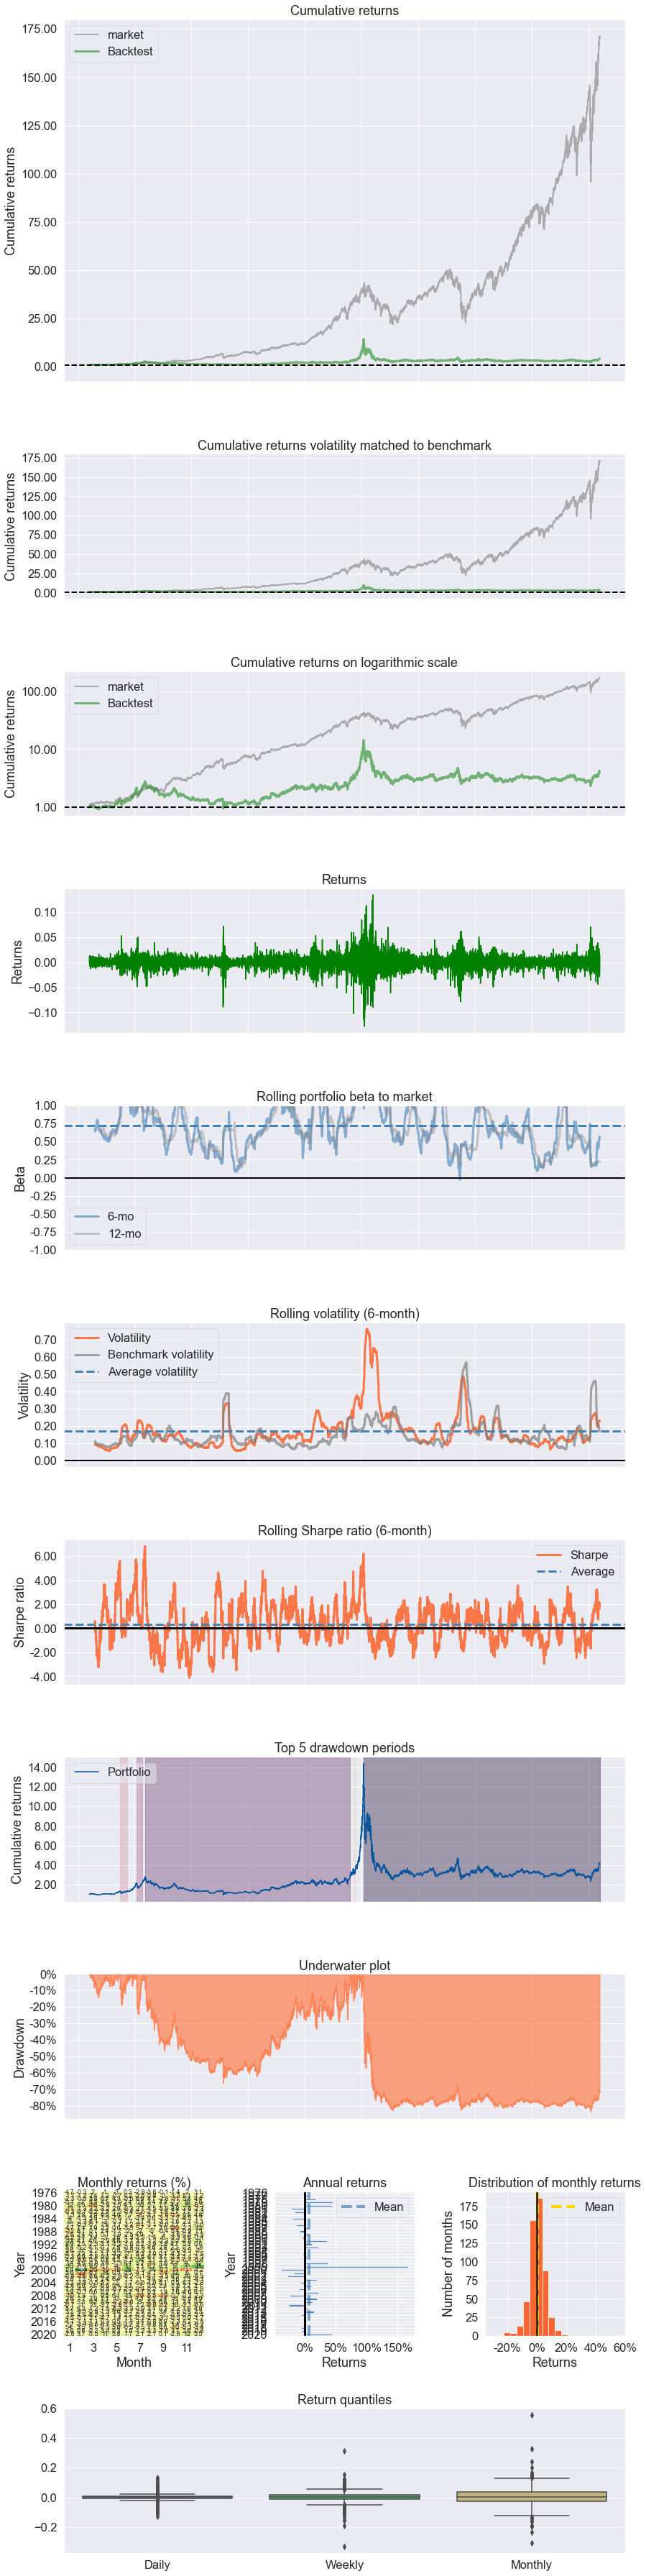

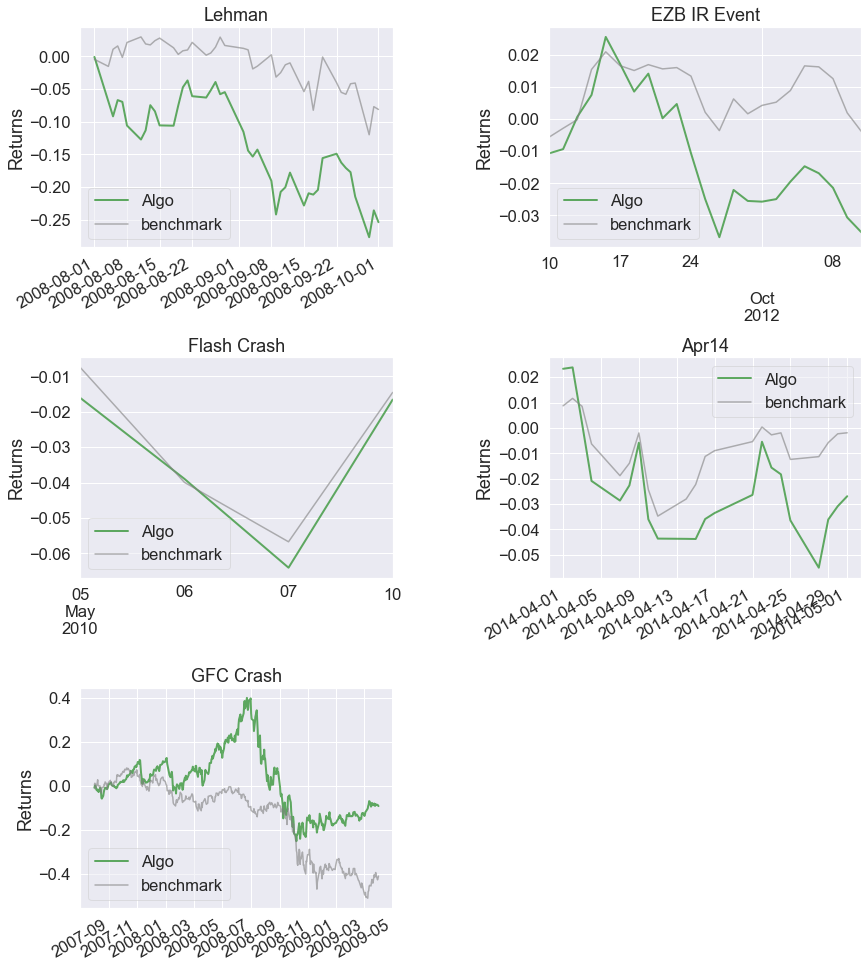

In [48]:
# Get overview
pf.create_full_tear_sheet(rf_results, benchmark_rets=market)

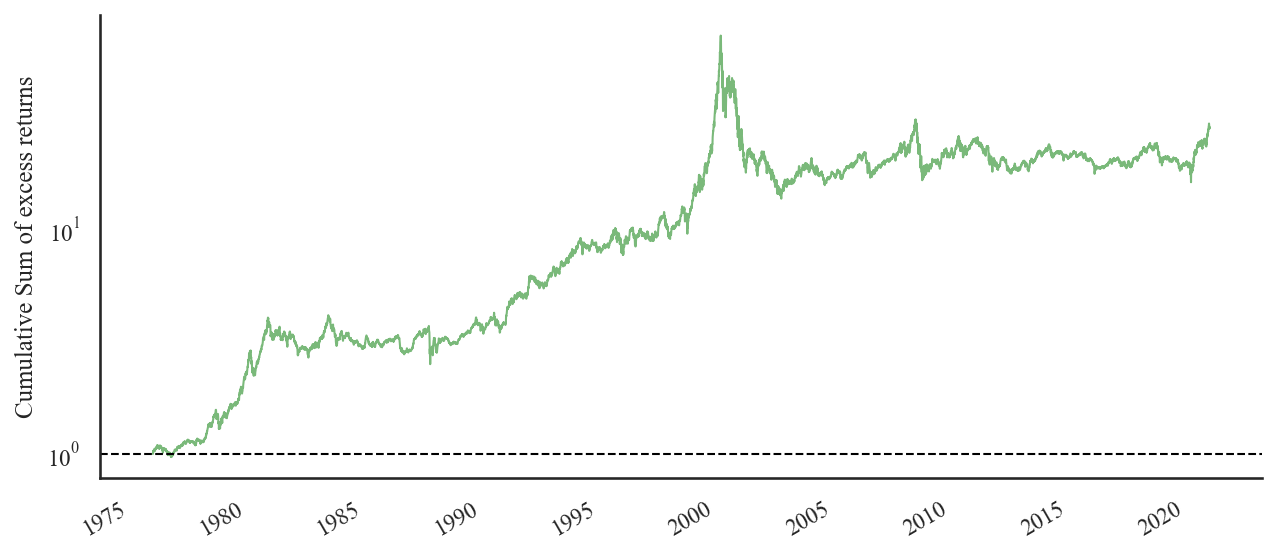

In [49]:
# Cumulative Returns
# Note we use returns here, not excess returns

plt.figure(figsize=(10, 10), dpi=150)

plt.subplot(2,1,1)
ax = plt.gca()
pf.plotting.plot_rolling_returns(rf_results_ret, kind='line')
ax.set_yscale('log')
plt.legend('', edgecolor='white',facecolor='white',  loc = 'upper left',)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel("Cumulative Sum of excess returns")
plt.xlabel("")

for line in ax.get_lines():
    line.set_linewidth(1)

No handles with labels found to put in legend.


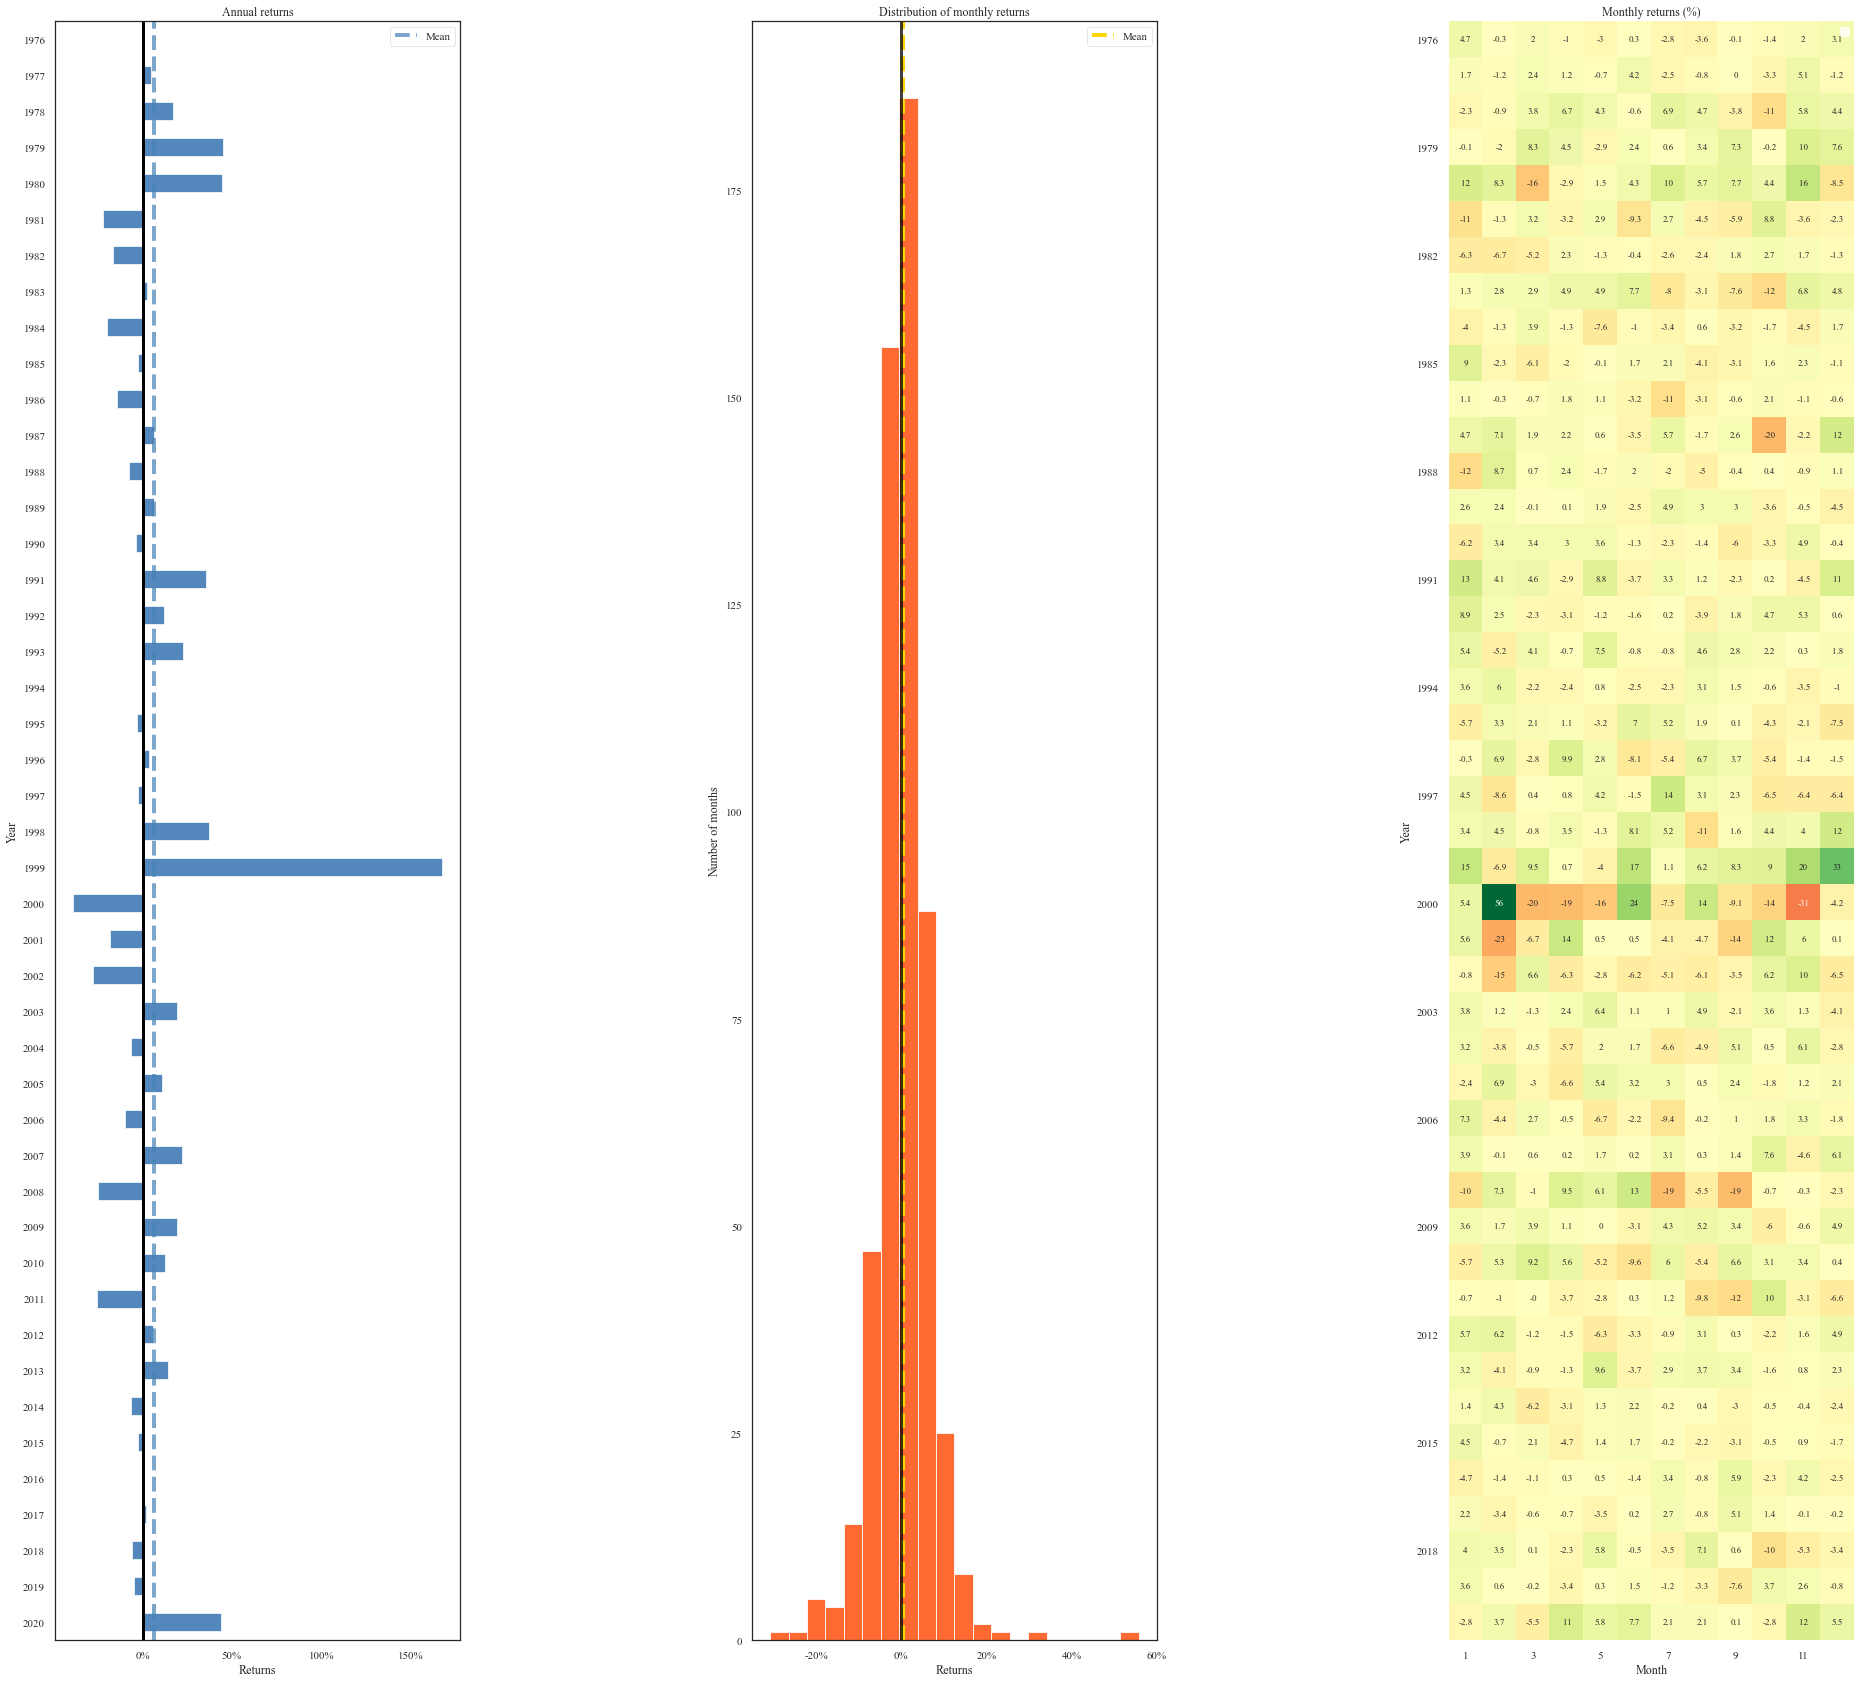

In [50]:
# Overview of monthly returns
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(rf_results)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(rf_results)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(rf_results)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')
plt.tight_layout()
fig.set_size_inches(30,30)

No handles with labels found to put in legend.


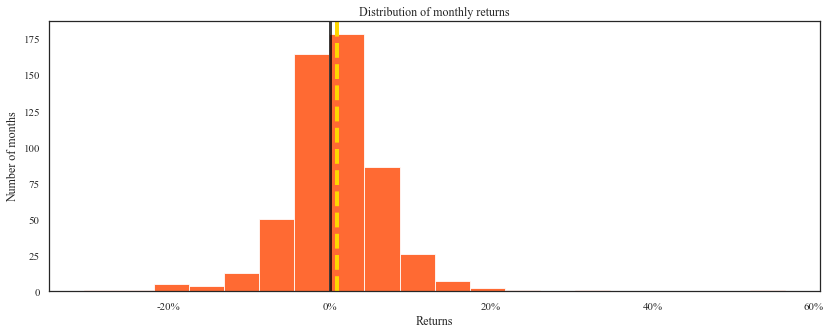

In [51]:
# Distribution of returns
# Note we use returns here, not excess returns

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_monthly_returns_dist(rf_results_ret)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')
plt.tight_layout()
#plt.Color = 'g';
fig.set_size_inches(40,5)

No handles with labels found to put in legend.


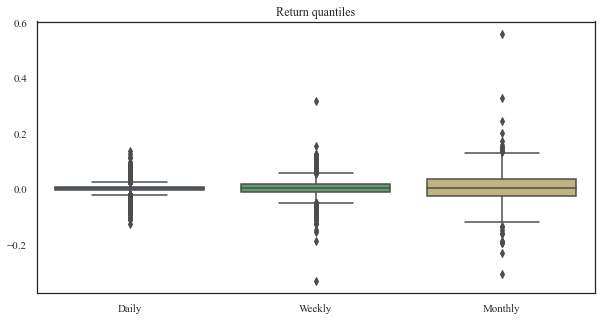

In [52]:
# Return quantiles
plt.figure(figsize=(10,5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')
pf.plot_return_quantiles(rf_results);

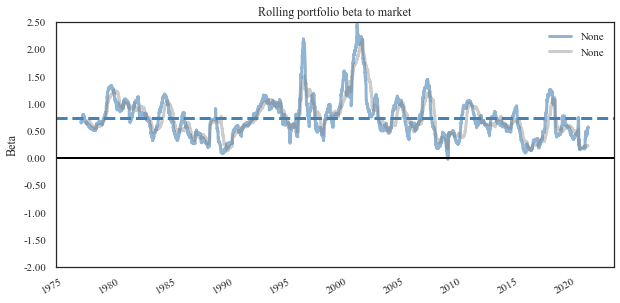

In [53]:
# Rolling beta
plt.figure(figsize=(10,5))
pf.plot_rolling_beta(rf_results, market);
plt.ylim([-2, 2.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')

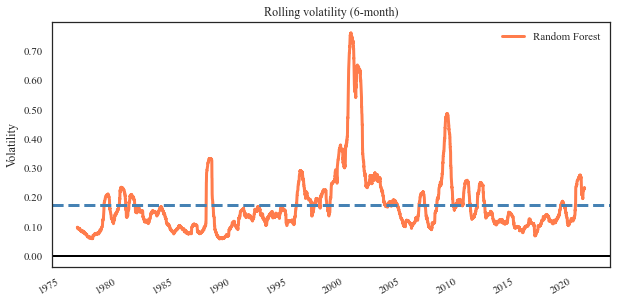

In [54]:
# Rolling volatility
plt.figure(figsize=(10,5))
pf.plot_rolling_volatility(rf_results);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')

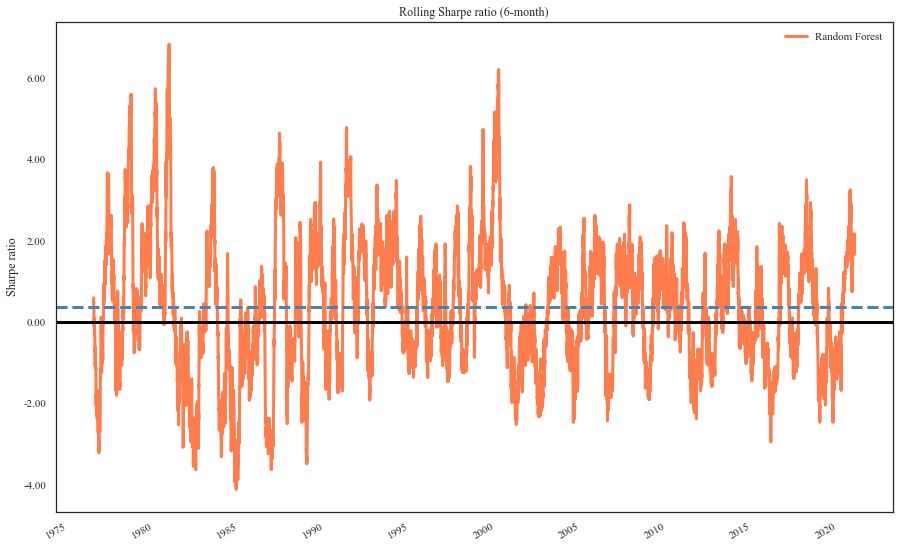

In [55]:
# Rolling sharpe ratio
plt.figure(figsize=(15,10))
pf.plot_rolling_sharpe(rf_results);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')

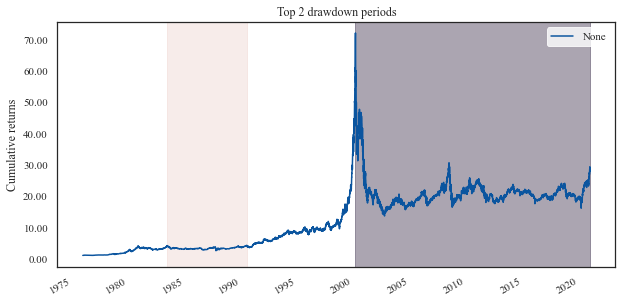

In [56]:
# Drawdown
# Note we use returns here, not excess returns

plt.figure(figsize=(10,5))
pf.plot_drawdown_periods(rf_results_ret);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')

Text(0.5, 0, '')

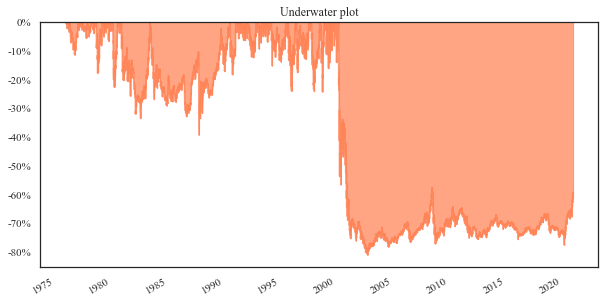

In [57]:
# Drawdown: Underwater plot
# Note we use returns here, not excess returns

plt.figure(figsize=(10,5))
pf.plot_drawdown_underwater(rf_results_ret);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend("", edgecolor='white',facecolor='white')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel("")
plt.xlabel("")

In [58]:
print("The Annual Exc. Return of the RF is: ", empyrical.annual_return(rf_results)*100)
print('RF T-stat excess returns:', stats.ttest_1samp(rf_results, 0.0))
print("The Volatility of the RF is: ", empyrical.annual_volatility(rf_results)*100)
print("The alpha of the RF is: ", empyrical.alpha(rf_results,excess_market)*100)
print("The alpha of the RF to MOM is: ", empyrical.alpha(rf_results,mom_results)*100)
print("The Beta of the RF is: ", empyrical.beta(rf_results,excess_market))
print("The Sharpe of the RF is: ", empyrical.sharpe_ratio(rf_results))
print("The Sortino of the RF is: ", empyrical.sortino_ratio(rf_results))
print("MD of the RF is: ", empyrical.max_drawdown(rf_results_ret)*100)

The Annual Exc. Return of the RF is:  3.1555457875933834
RF T-stat excess returns: Ttest_1sampResult(statistic=1.7094547432181282, pvalue=0.087394085410613)
The Volatility of the RF is:  20.33911311100635
The alpha of the RF is:  -0.6248322725633471
The alpha of the RF to MOM is:  1.6402830586047967
The Beta of the RF is:  0.6749997590585204
The Sharpe of the RF is:  0.25471818249743927
The Sortino of the RF is:  0.3563025654562976
MD of the RF is:  -81.13917940225059


In [59]:
# Testing estimated alpha and beta
y=rf_results
X=sm.add_constant(mom_results)
model = sm.OLS(y, X)
results = model.fit()
params = results.params

# Print beta, alpha and t-stats
print('Beta:', params[0])
print('Alpha:', params['const']*252)
print('')
print(results.t_test([2, 0]))

Beta: 6.456461346465638e-05
Alpha: 0.016270282593093408

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0001      0.000      0.590      0.555      -0.000       0.001


In [60]:
rf_monthly = empyrical.stats.aggregate_returns(rf_results_ret,'monthly')

In [61]:
rf_monthly_df = pd.DataFrame()
rf_monthly_df['ret'] = rf_monthly

In [62]:
# NOTE: This is not excess returns
(rf_monthly_df.sort_values('ret')*100).head(10)

ret
2000 11 -30.483173
2001 2  -23.052580
1987 10 -19.241408
2000 3  -19.208779
2008 7  -19.049641
     9  -19.026852
2000 4  -18.716538
     5  -15.797938
1980 3  -15.308036
2002 2  -14.929299

In [63]:
# NOTE: This is not based on excess returns
scipy.stats.skew(rf_monthly_df)

array([1.05199355])

In [64]:
rf_monthly_df['1+ret'] = rf_monthly_df['ret']+1 
rf_monthly_df['cum_ret'] = rf_monthly_df['1+ret'].cumprod()

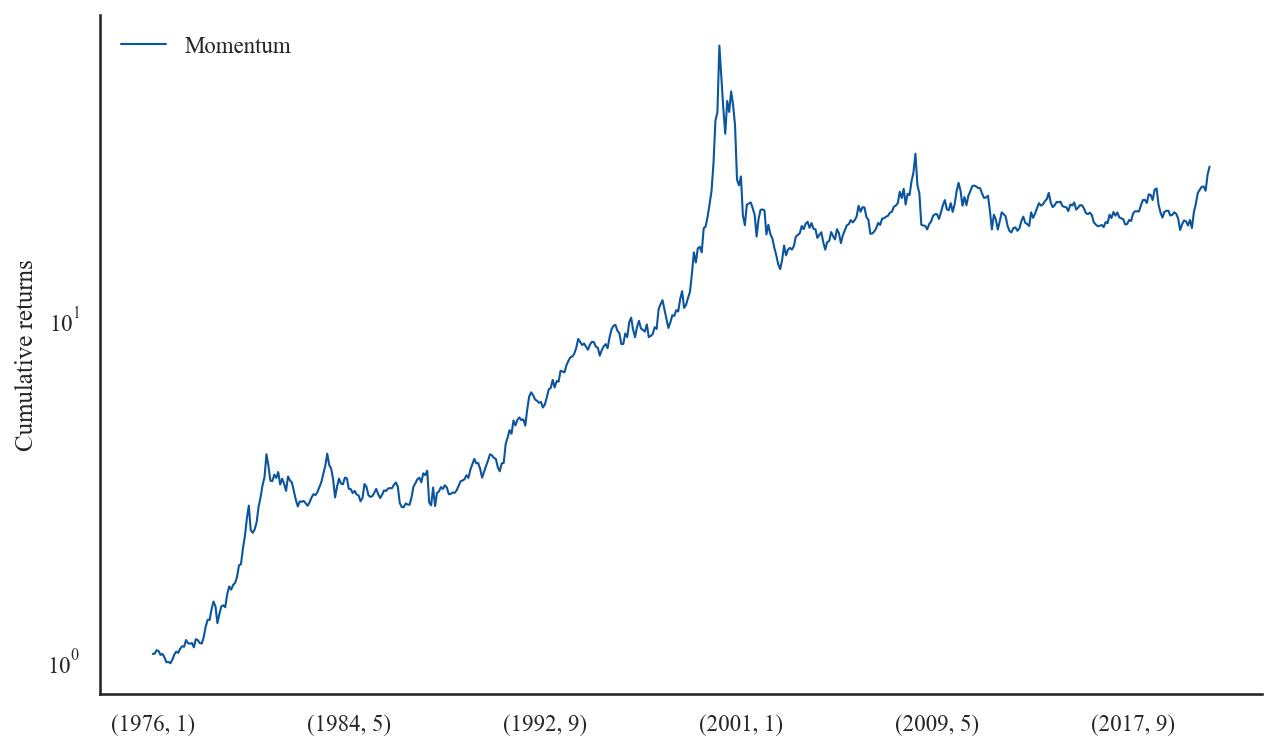

In [65]:
# Cumulative return
import matplotlib.dates as mdates
from matplotlib.pyplot import figure

plt.rcParams["font.family"] = "Times New Roman"

figure(figsize=(10, 6), dpi=150)
ax = plt.gca()
rf_monthly_df.plot(kind='line', y='cum_ret', linewidth=1, ax=ax)
plt.ylabel("Cumulative returns")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log') 
plt.legend(['Momentum'], loc = 'upper left', edgecolor='white',facecolor='white')

## 6. MLP

**Importing MLP data**

In [66]:
# Import values
mlp_results = pd.read_csv('mlp_results.csv', low_memory=False, index_col=0)
mlp_results.index = pd.to_datetime(mlp_results.index).tz_localize('UTC')

In [67]:
# Sort values in ascending order
mlp_results.sort_values('long_short', ascending=True)

long_short
daily_date                           
2001-04-05 00:00:00+00:00   -0.075885
2001-01-03 00:00:00+00:00   -0.063839
2001-04-10 00:00:00+00:00   -0.060093
2000-10-19 00:00:00+00:00   -0.058105
2001-04-18 00:00:00+00:00   -0.056030
...                               ...
2000-10-02 00:00:00+00:00    0.046687
2001-02-16 00:00:00+00:00    0.048927
2001-02-20 00:00:00+00:00    0.050499
2001-03-28 00:00:00+00:00    0.056682
2001-02-27 00:00:00+00:00    0.067812

[11350 rows x 1 columns]

In [68]:
# Define start and end date
mlp_results = mlp_results[mlp_results.index >= start]
mlp_results = mlp_results[mlp_results.index <= end]

In [69]:
mlp_results = mlp_results.rename(columns={'long_short':'MLP'})

In [70]:
mlp_results = mlp_results['MLP']

In [71]:
# Make non-excess returns
mlp_results_ret = mlp_results + risk_free

**MLP Results**

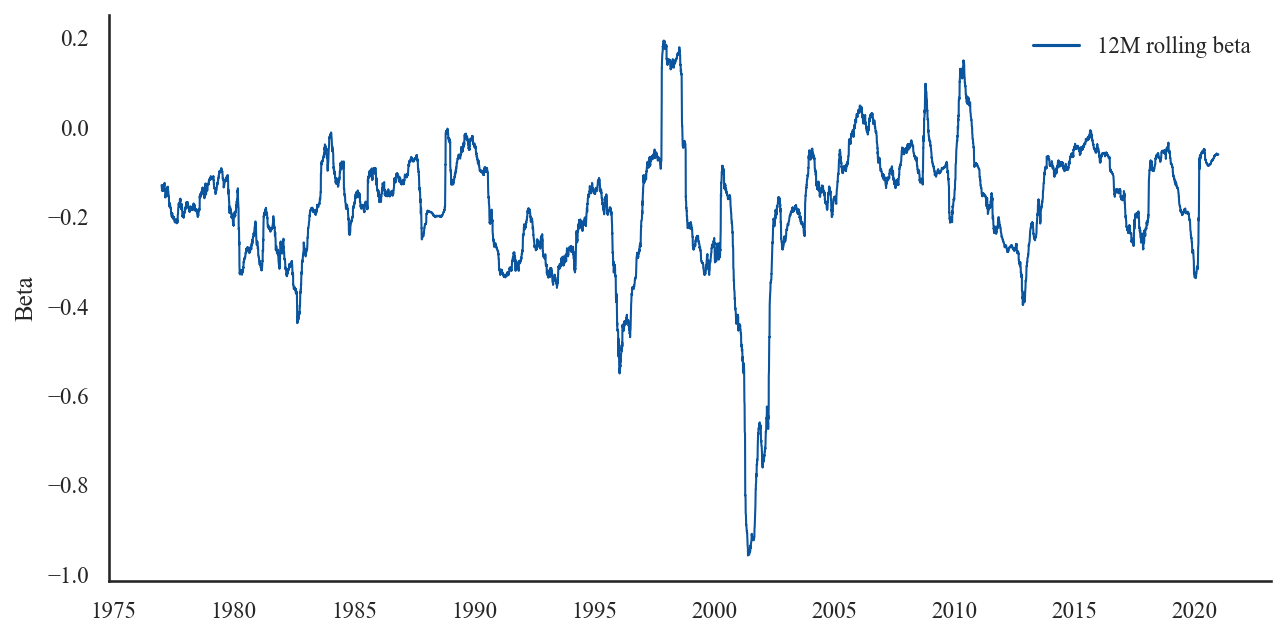

In [72]:
# Estimating rolling beta 12M
y=mlp_results
X=sm.add_constant(excess_market)
rols = RollingOLS(y, X, window=252, min_nobs=252) #don't include NaN values
res_12M = rols.fit()
res_12M.params

# Plotting rolling betas
plt.figure(figsize=(10,5), dpi=150)
ax = plt.gca()
plt.plot(res_12M.params[0], label="12M rolling beta")
plt.legend(loc="upper right", edgecolor='white')
plt.ylabel('Beta', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for line in ax.get_lines():
    line.set_linewidth(1)

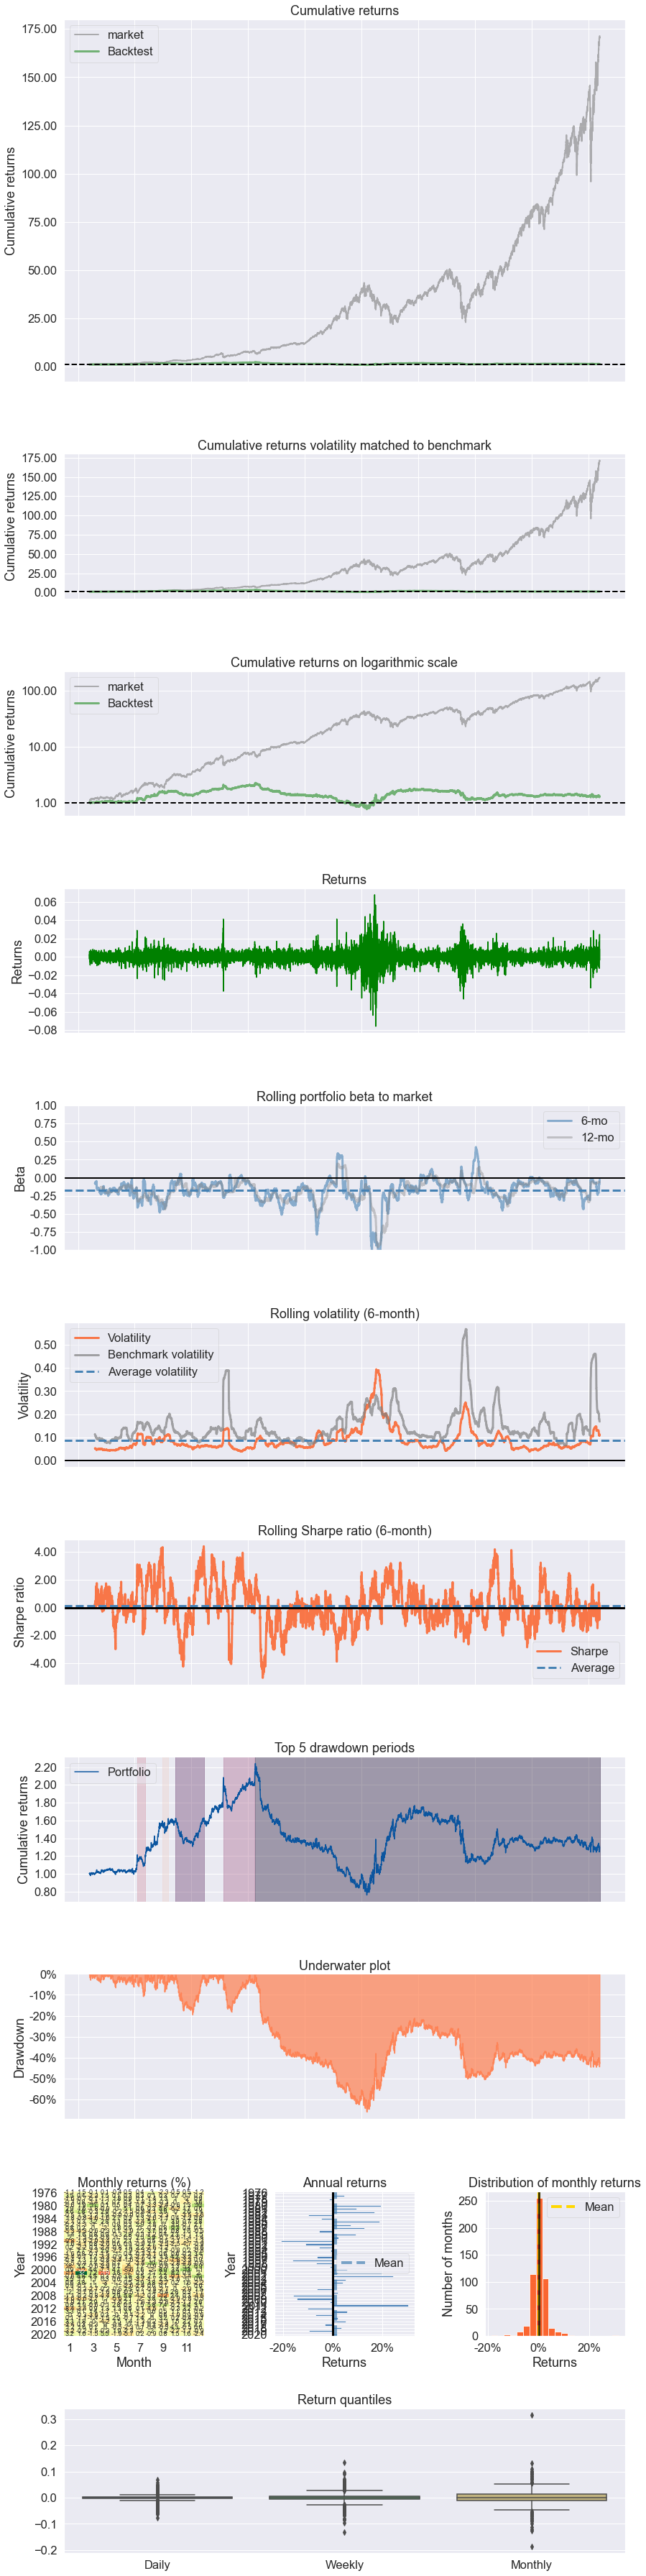

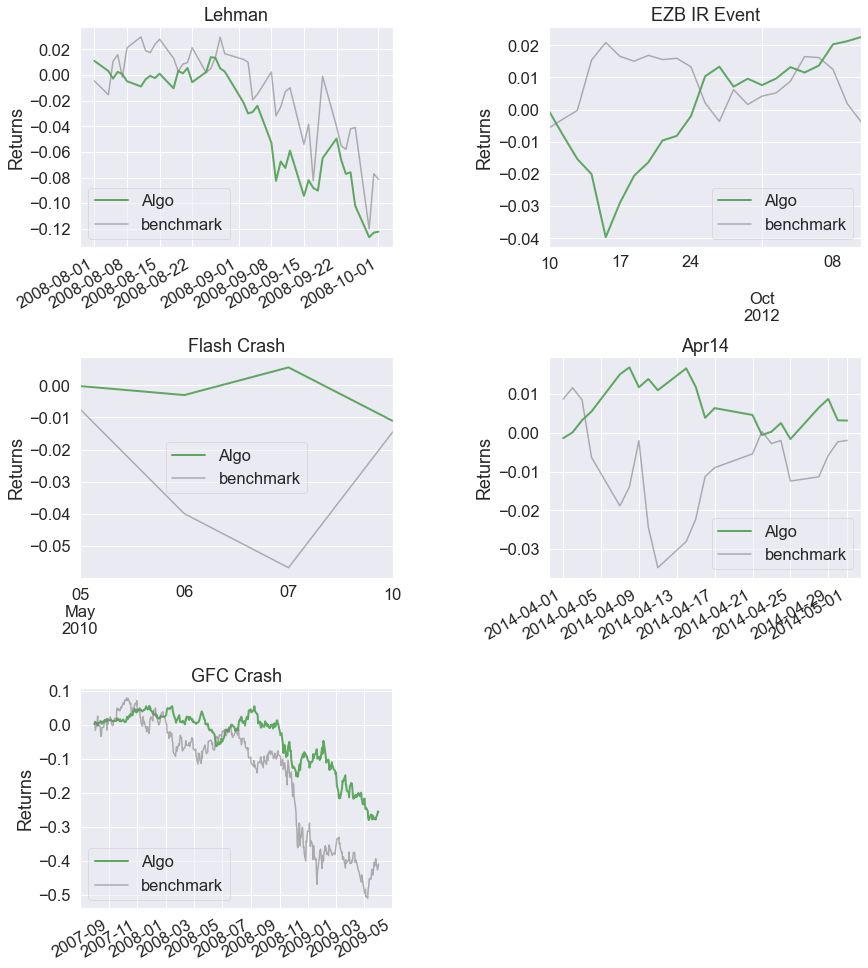

In [73]:
# Get overview
pf.create_full_tear_sheet(mlp_results, benchmark_rets=market)

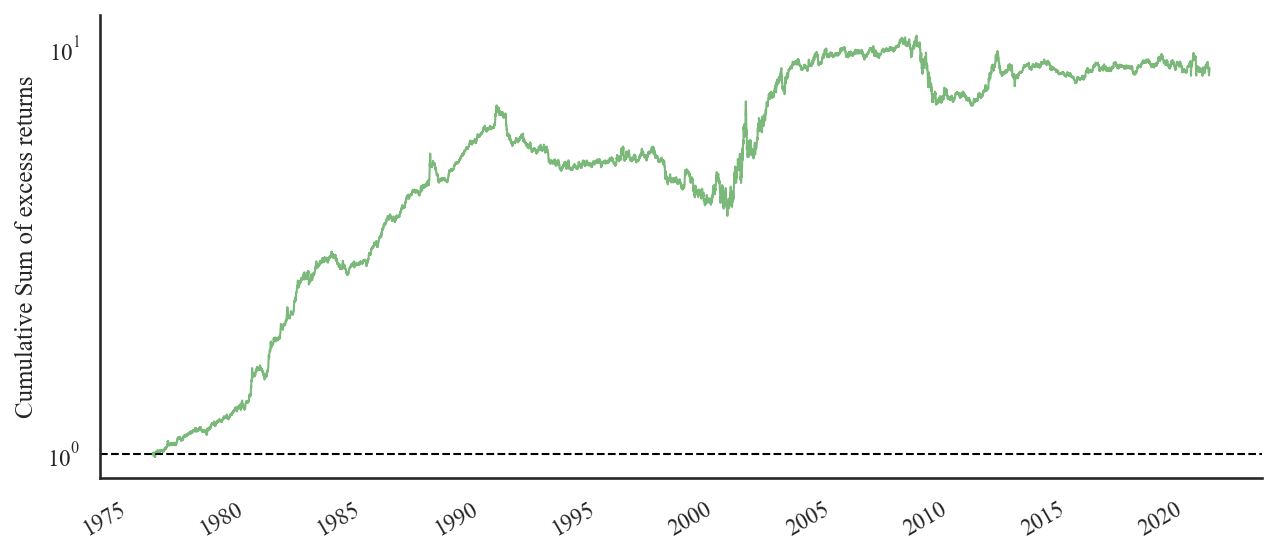

In [74]:
# Cumulative Returns
# Note we use returns here, not excess returns

plt.figure(figsize=(10, 10), dpi=150)

plt.subplot(2,1,1)
ax = plt.gca()
pf.plotting.plot_rolling_returns(mlp_results_ret, kind='line')
ax.set_yscale('log')
plt.legend('', edgecolor='white',facecolor='white',  loc = 'upper left',)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel("Cumulative Sum of excess returns")
plt.xlabel("")

for line in ax.get_lines():
    line.set_linewidth(1)

No handles with labels found to put in legend.


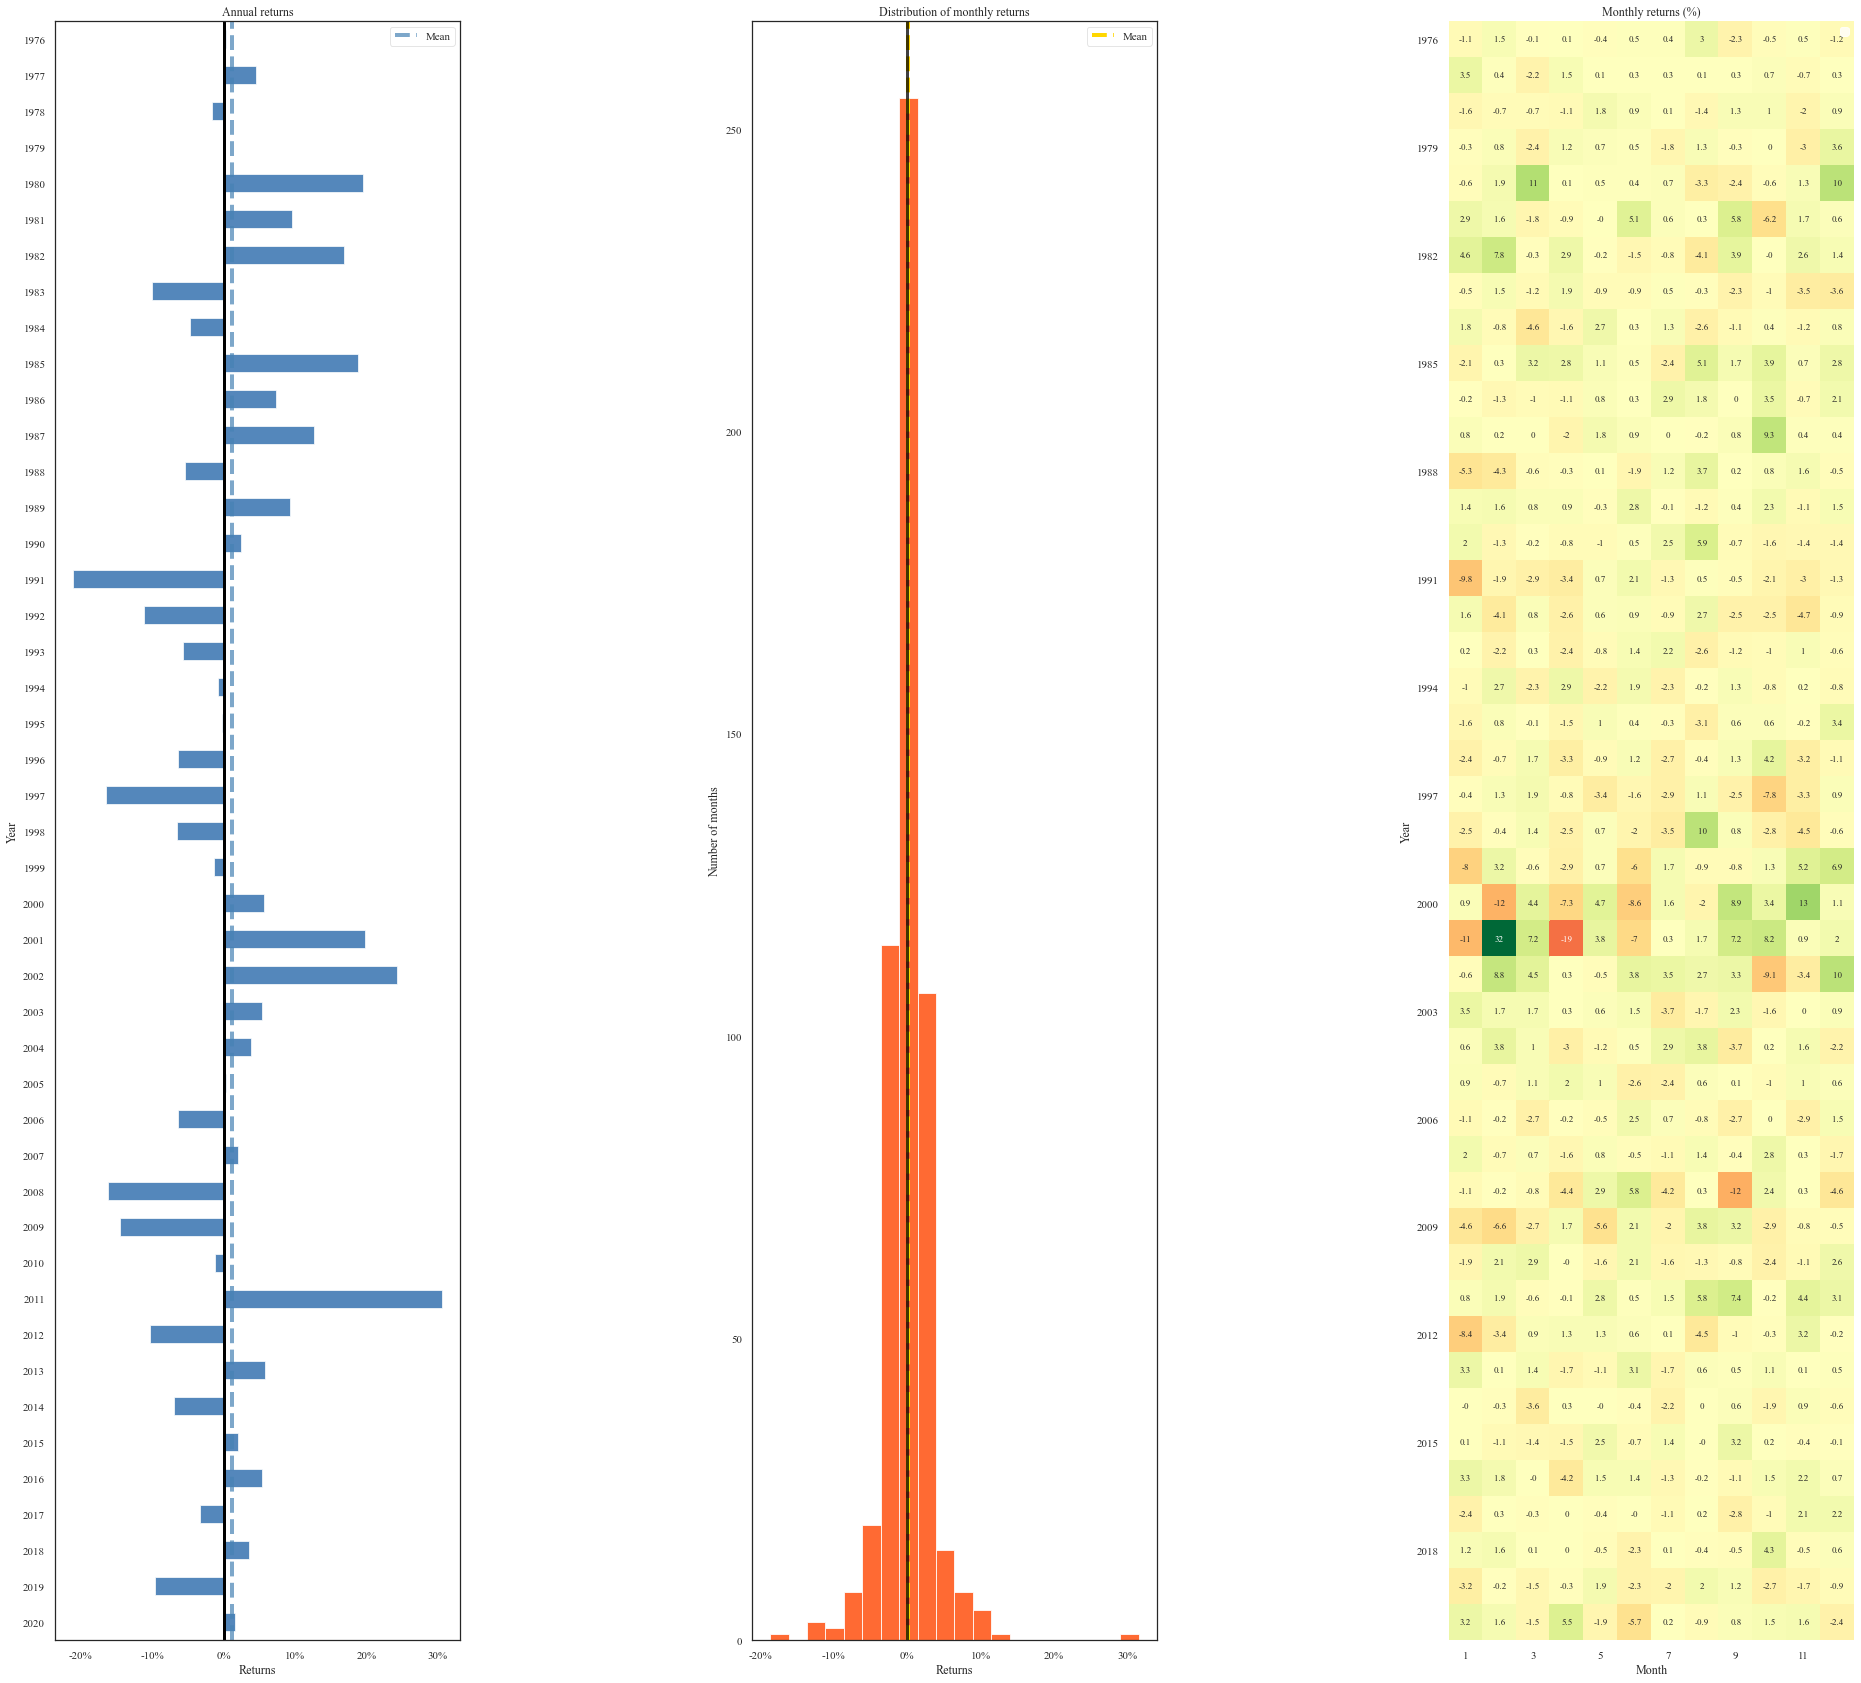

In [75]:
# Overview of monthly returns
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(mlp_results)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(mlp_results)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(mlp_results)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')
plt.tight_layout()
fig.set_size_inches(30,30)

No handles with labels found to put in legend.


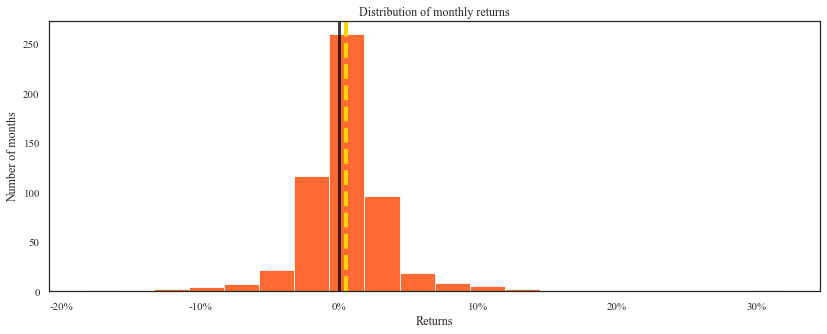

In [76]:
# Distribution of returns
# Note we use returns here, not excess returns
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_monthly_returns_dist(mlp_results_ret)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')
plt.tight_layout()
#plt.Color = 'g';
fig.set_size_inches(40,5)

No handles with labels found to put in legend.


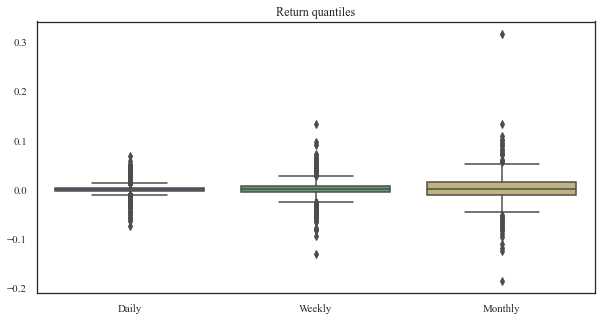

In [77]:
# Return quantiles
plt.figure(figsize=(10,5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')
pf.plot_return_quantiles(mlp_results);

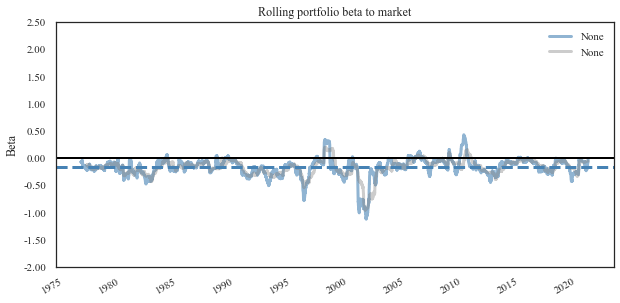

In [78]:
# Rolling beta
plt.figure(figsize=(10,5))
pf.plot_rolling_beta(mlp_results, market);
plt.ylim([-2, 2.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')

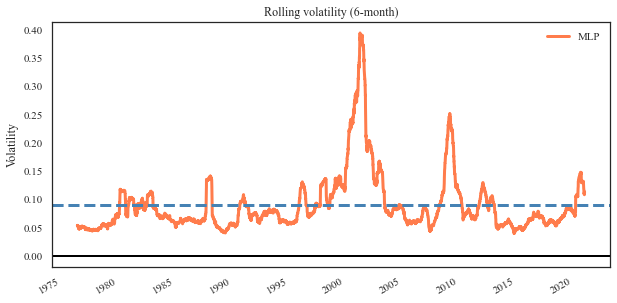

In [79]:
# Rolling volatility
plt.figure(figsize=(10,5))
pf.plot_rolling_volatility(mlp_results);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')

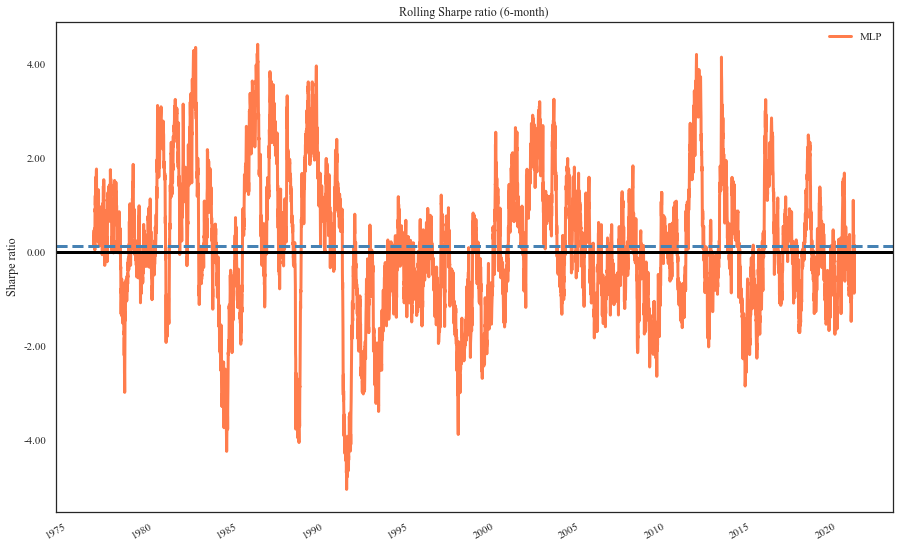

In [80]:
# Rolling sharpe ratio
plt.figure(figsize=(15,10))
pf.plot_rolling_sharpe(mlp_results);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')

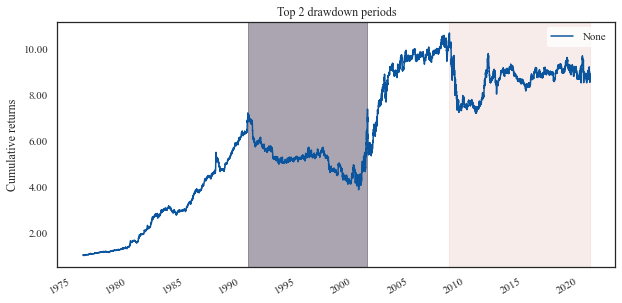

In [81]:
# Drawdown
# Note we use returns here, not excess returns

plt.figure(figsize=(10,5))
pf.plot_drawdown_periods(mlp_results_ret);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')

Text(0.5, 0, '')

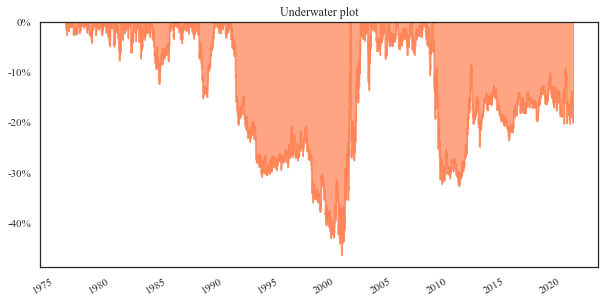

In [82]:
# Drawdown: Underwater plot
# Note we use returns here, not excess returns

plt.figure(figsize=(10,5))
pf.plot_drawdown_underwater(mlp_results_ret);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend("", edgecolor='white',facecolor='white')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel("")
plt.xlabel("")

In [83]:
print("The Annual Exc. Return of the MLP is: ", empyrical.annual_return(mlp_results)*100)
print('MLP T-stat excess returns:', stats.ttest_1samp(mlp_results, 0.0))
print("The Volatility of the MLP is: ", empyrical.annual_volatility(mlp_results)*100)
print("The alpha of the MLP is: ", empyrical.alpha(mlp_results,excess_market)*100)
print("The Beta of the MLP is: ", empyrical.beta(mlp_results,excess_market))
print("The Sharpe of the MLP is: ", empyrical.sharpe_ratio(mlp_results))
print("The Sortino of the MLP is: ", empyrical.sortino_ratio(mlp_results))
print("MD of the MLP is: ", empyrical.max_drawdown(mlp_results_ret)*100)

The Annual Exc. Return of the MLP is:  0.5813001247433114
MLP T-stat excess returns: Ttest_1sampResult(statistic=0.7235972924549378, pvalue=0.46932791777819205)
The Volatility of the MLP is:  10.356459875076242
The alpha of the MLP is:  2.668504889644918
The Beta of the MLP is:  -0.17632151125171514
The Sharpe of the MLP is:  0.10781998641696147
The Sortino of the MLP is:  0.15107810394897592
MD of the MLP is:  -46.50952929732324


In [84]:
# Testing estimated alpha and beta
y=mlp_results
X=sm.add_constant(mom_results)
model = sm.OLS(y, X)
results = model.fit()
params = results.params

# Print beta, alpha and t-stats
print('Beta:', params[0])
print('Alpha:', params['const']*252)
print('')
print(results.t_test([2, 0]))

Beta: 2.7427128434081966e-05
Alpha: 0.006911636365388656

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          5.485e-05      0.000      0.450      0.653      -0.000       0.000


In [85]:
mlp_monthly = empyrical.stats.aggregate_returns(mlp_results,'monthly')

In [86]:
mlp_monthly_df = pd.DataFrame()
mlp_monthly_df['ret'] = mlp_monthly

In [87]:
# NOTE: This is not excess returns
(mlp_monthly_df.sort_values('ret')*100).head(10)

ret
2001 4  -18.661238
2008 9  -12.526543
2000 2  -12.026475
2001 1  -11.217146
1991 1   -9.763245
2002 10  -9.135196
2000 6   -8.599632
2012 1   -8.379815
1999 1   -7.977419
1997 10  -7.789300

In [88]:
# NOTE: This is not based on excess returns
scipy.stats.skew(mlp_monthly_df)

array([1.32971234])

In [89]:
mlp_monthly_df['1+ret'] = mlp_monthly_df['ret']+1 
mlp_monthly_df['cum_ret'] = mlp_monthly_df['1+ret'].cumprod()

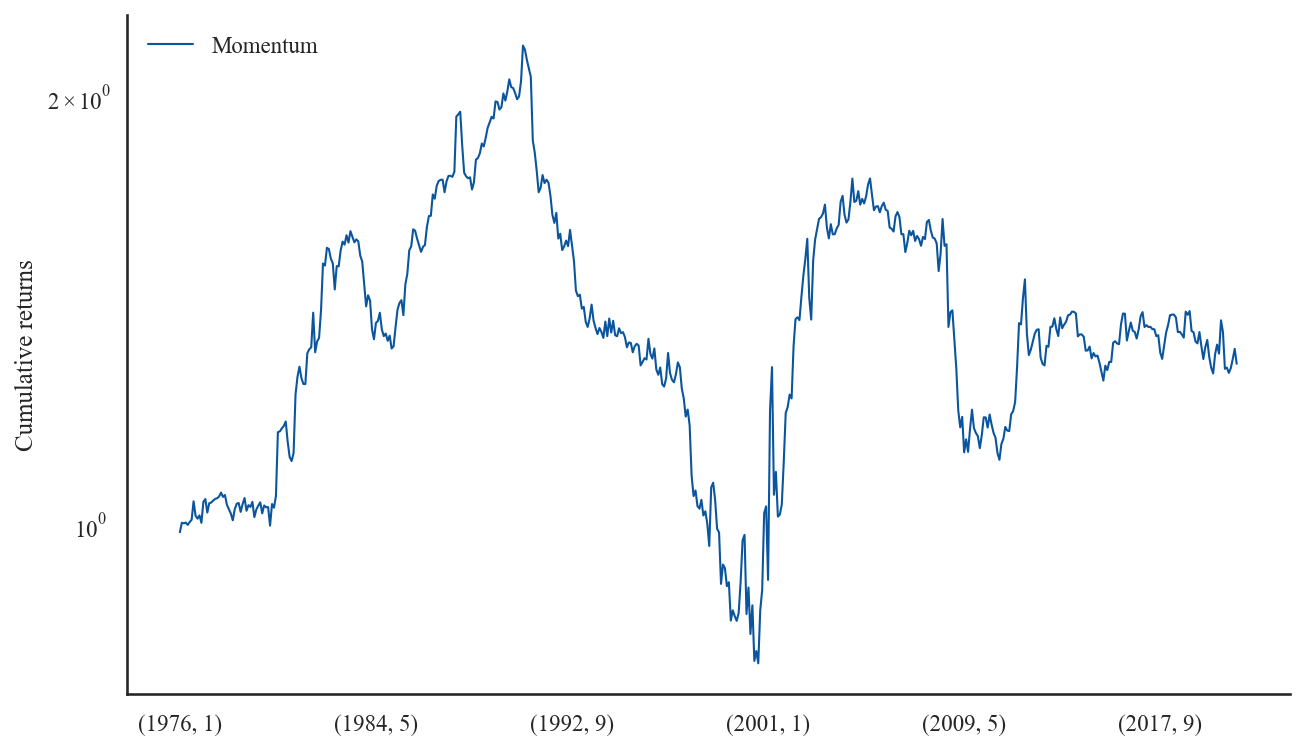

In [90]:
# Cumulative return
import matplotlib.dates as mdates
from matplotlib.pyplot import figure

plt.rcParams["font.family"] = "Times New Roman"

figure(figsize=(10, 6), dpi=150)
ax = plt.gca()
mlp_monthly_df.plot(kind='line', y='cum_ret', linewidth=1, ax=ax)
plt.ylabel("Cumulative returns")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log') 
plt.legend(['Momentum'], loc = 'upper left', edgecolor='white',facecolor='white')

## 7. RNN with LSTM cells

**Importing RNN data**

In [39]:
# Import values
rnn_results = pd.read_csv('lstm_results.csv', low_memory=False, index_col=0)
rnn_results.index = pd.to_datetime(rnn_results.index).tz_localize('UTC')

In [40]:
# Sort values in ascending order
rnn_results.sort_values('long_short', ascending=True)

long_short
daily_date                           
2020-03-19 00:00:00+00:00   -0.079439
2001-02-14 00:00:00+00:00   -0.060735
2008-10-15 00:00:00+00:00   -0.060079
2000-01-10 00:00:00+00:00   -0.058578
2000-10-19 00:00:00+00:00   -0.058190
...                               ...
2001-02-27 00:00:00+00:00    0.075347
2008-11-24 00:00:00+00:00    0.075875
2001-04-18 00:00:00+00:00    0.081682
2008-10-13 00:00:00+00:00    0.086467
2001-04-05 00:00:00+00:00    0.095599

[11350 rows x 1 columns]

In [41]:
# Define start and end date
rnn_results = rnn_results[rnn_results.index >= start]
rnn_results = rnn_results[rnn_results.index <= end]

In [42]:
rnn_results = rnn_results.rename(columns={'long_short':'RNN'})

In [43]:
rnn_results = rnn_results['RNN']

In [44]:
# Make non-excess returns
rnn_results_ret = rnn_results + risk_free

**RNN Results**

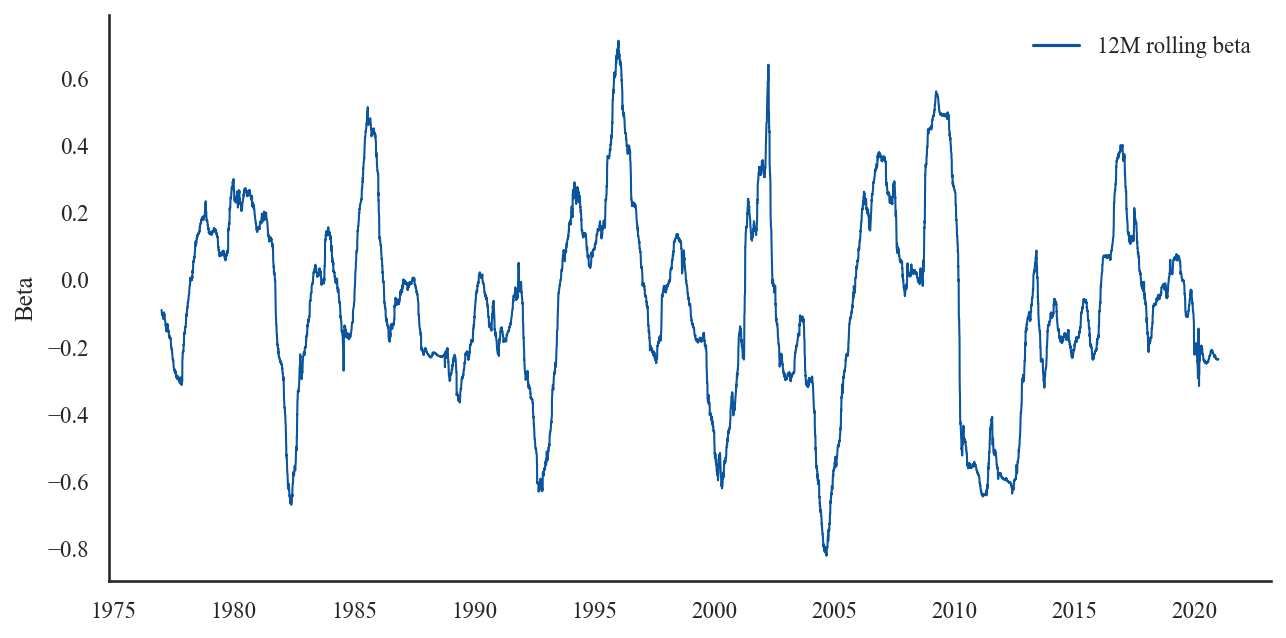

In [45]:
# Estimating rolling beta 12M
y=rnn_results
X=sm.add_constant(excess_market)
rols = RollingOLS(y, X, window=252, min_nobs=252) #don't include NaN values
res_12M = rols.fit()
res_12M.params

# Plotting rolling betas
plt.figure(figsize=(10,5), dpi=150)
ax = plt.gca()
plt.plot(res_12M.params[0], label="12M rolling beta")
plt.legend(loc="upper right", edgecolor='white')
plt.ylabel('Beta', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for line in ax.get_lines():
    line.set_linewidth(1)

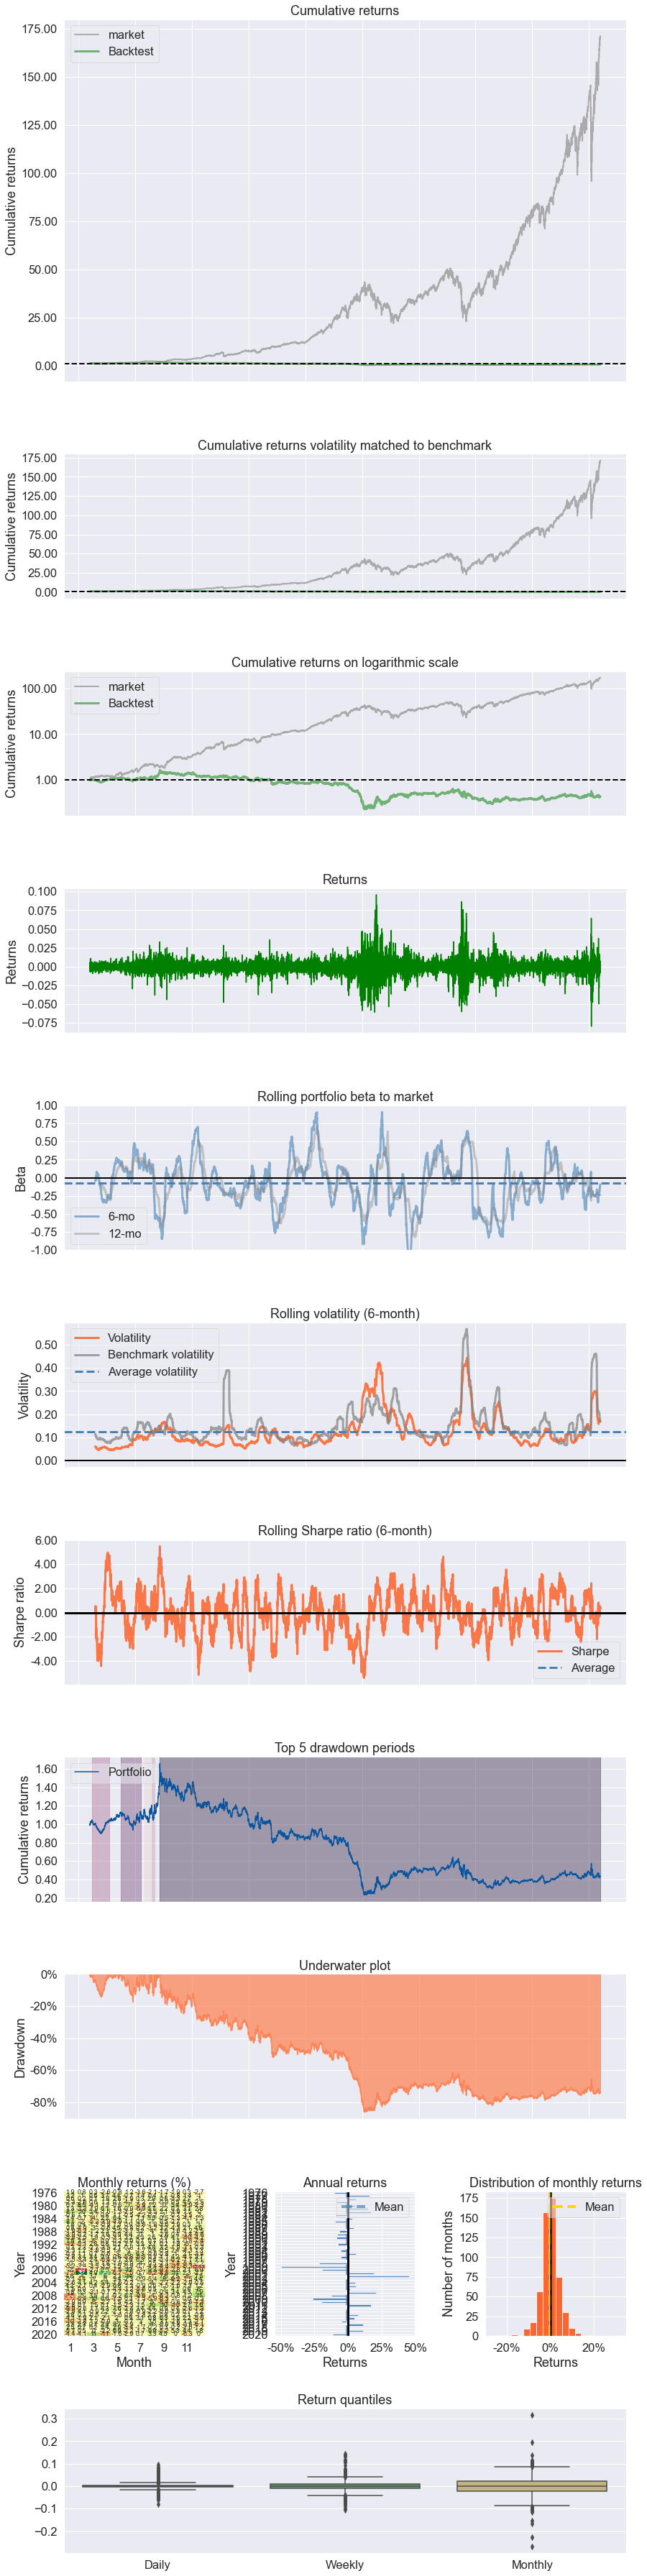

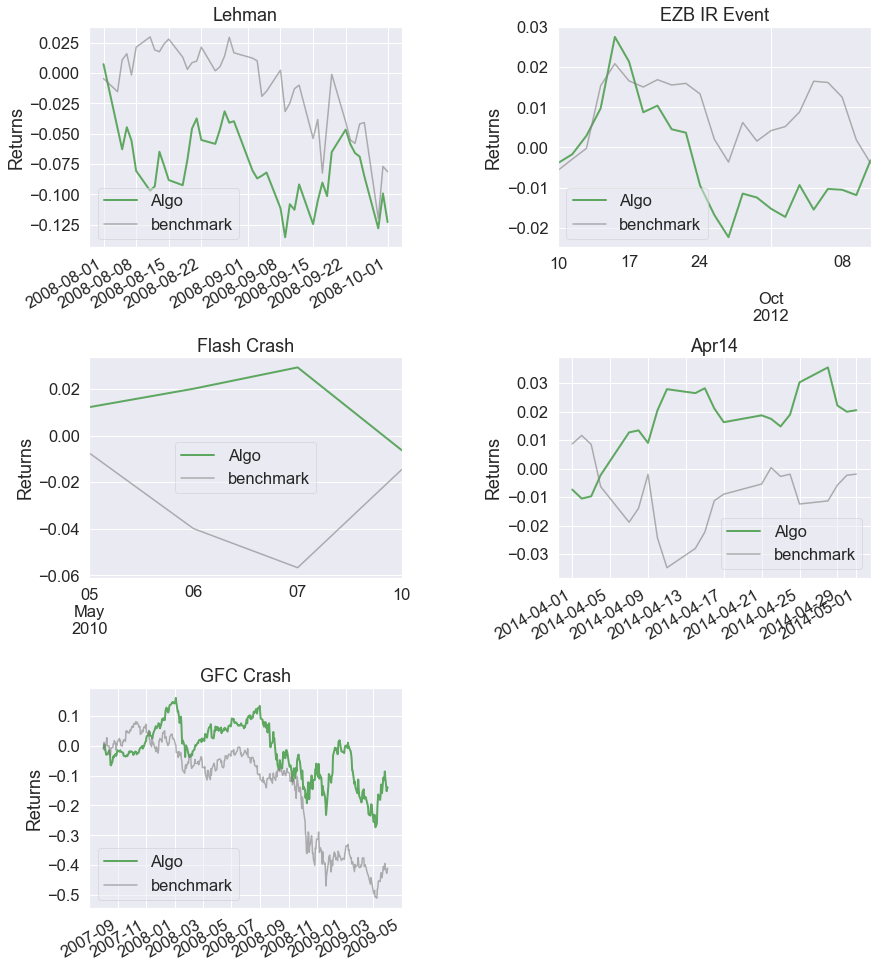

In [46]:
# Get overview
pf.create_full_tear_sheet(rnn_results, benchmark_rets=market)

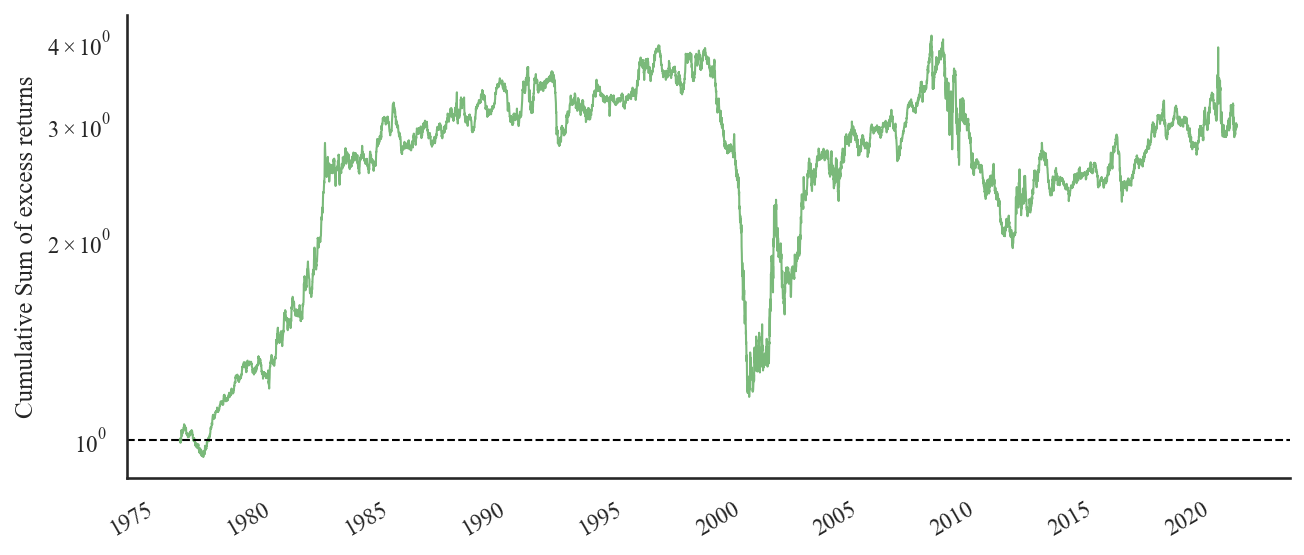

In [47]:
# Cumulative Returns
# Note we use returns here, not excess returns

plt.figure(figsize=(10, 10), dpi=150)

plt.subplot(2,1,1)
ax = plt.gca()
pf.plotting.plot_rolling_returns(rnn_results_ret, kind='line')
ax.set_yscale('log')
plt.legend('', edgecolor='white',facecolor='white',  loc = 'upper left',)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel("Cumulative Sum of excess returns")
plt.xlabel("")

for line in ax.get_lines():
    line.set_linewidth(1)

No handles with labels found to put in legend.


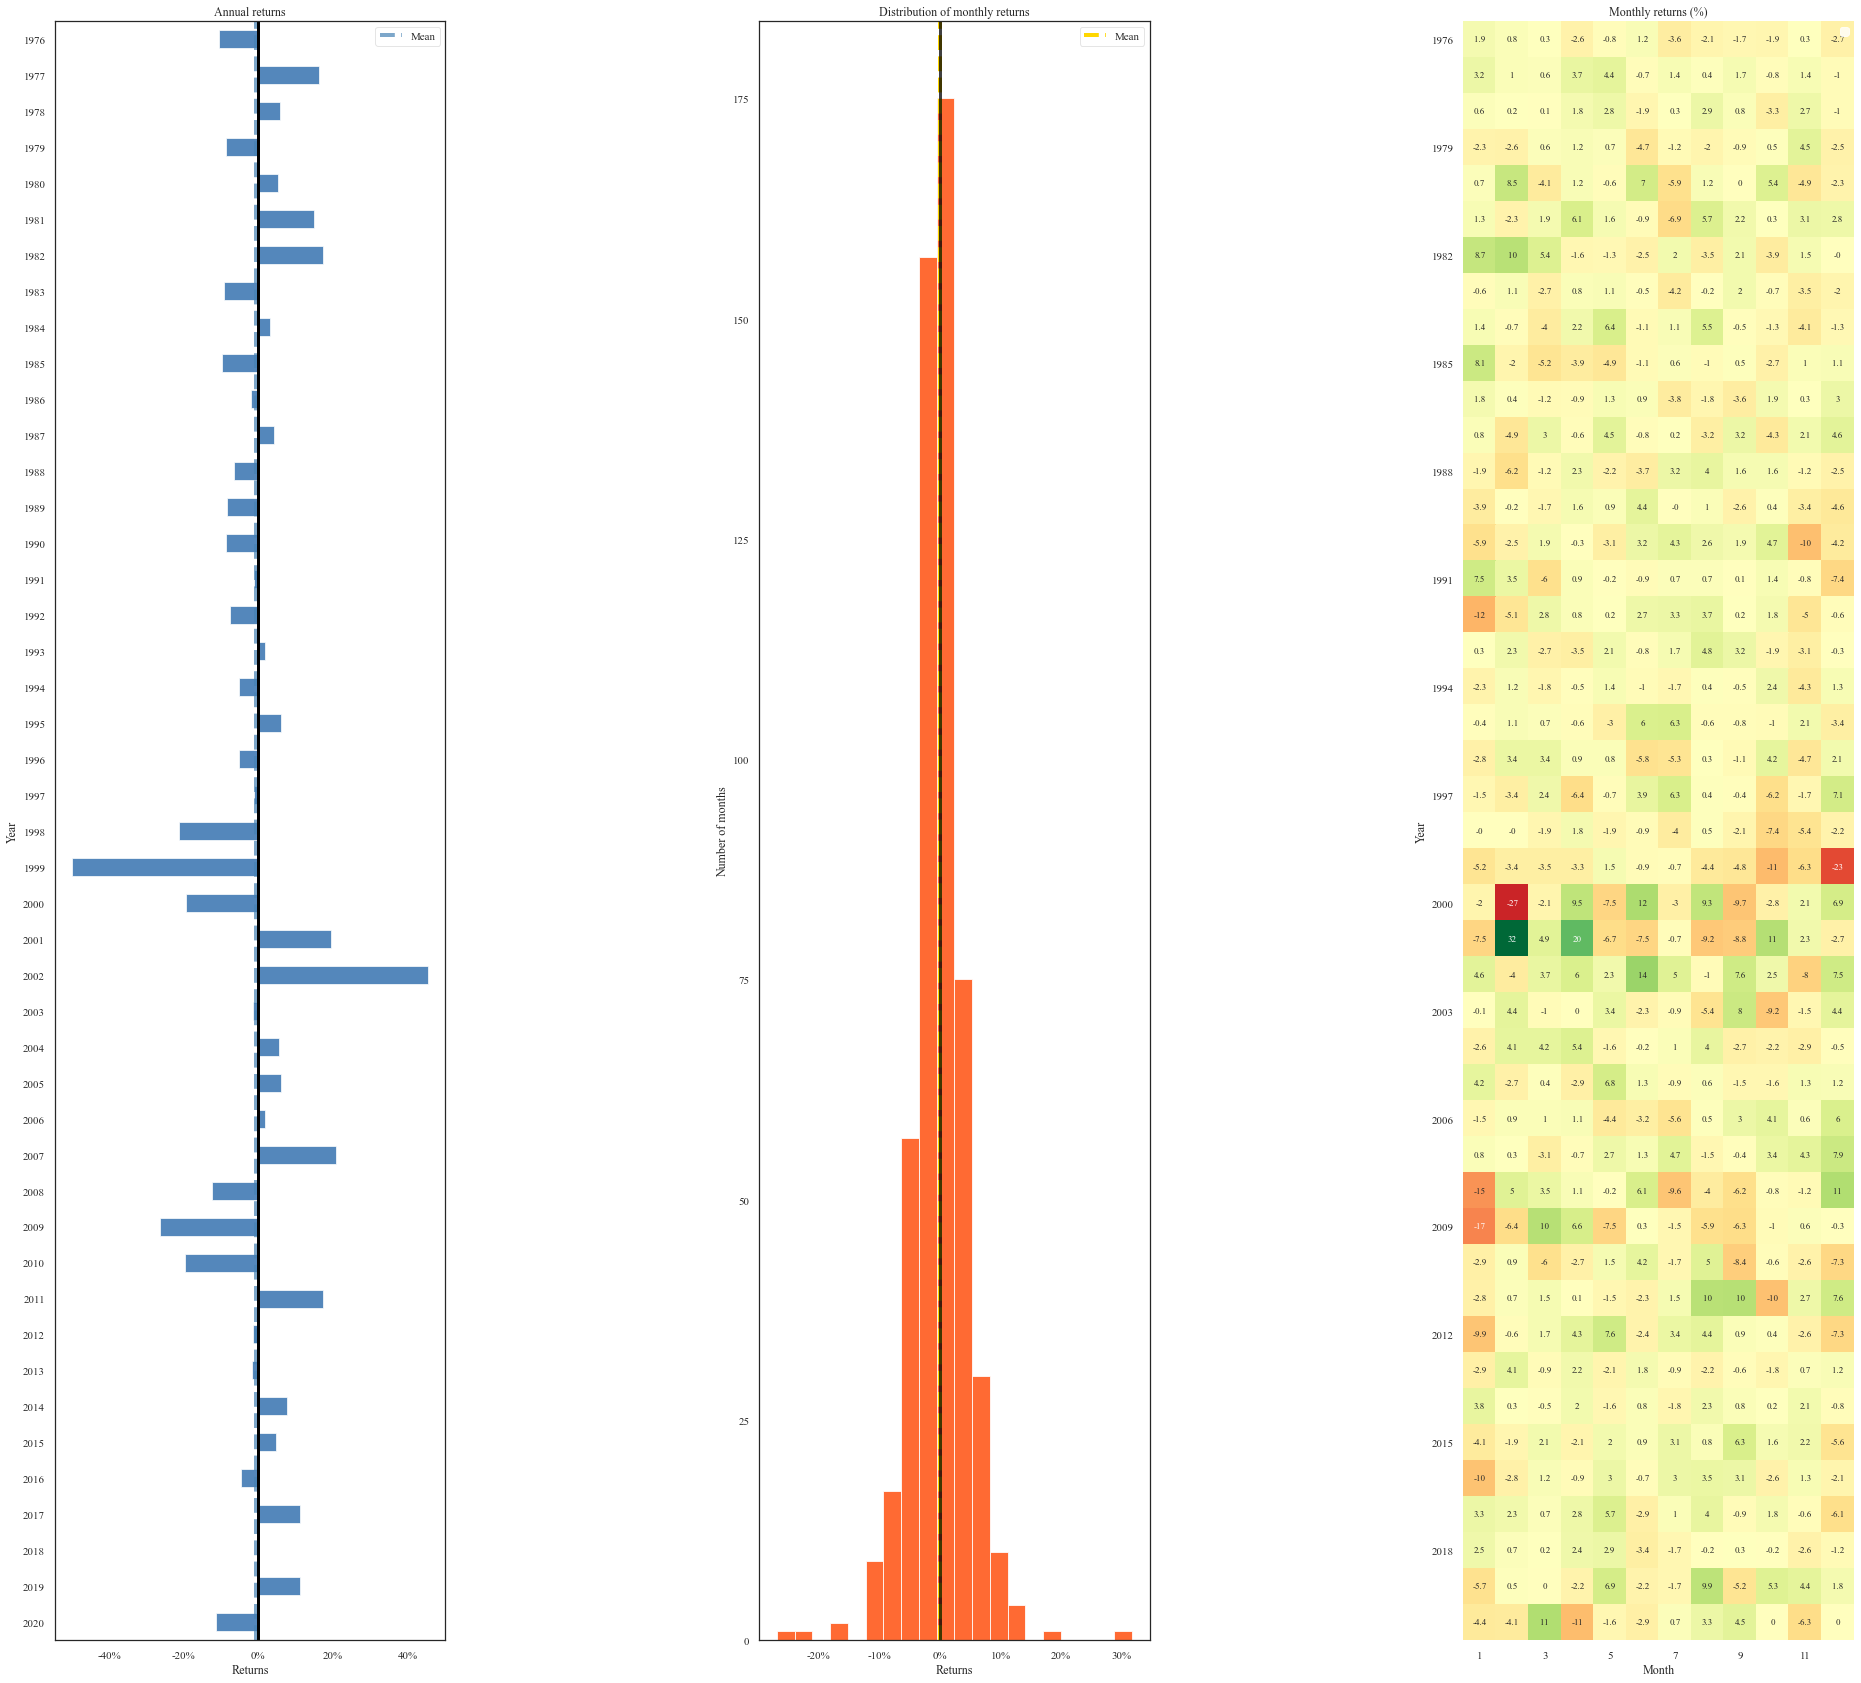

In [48]:
# Overview of monthly returns
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(rnn_results)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(rnn_results)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(rnn_results)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')
plt.tight_layout()
fig.set_size_inches(30,30)

No handles with labels found to put in legend.


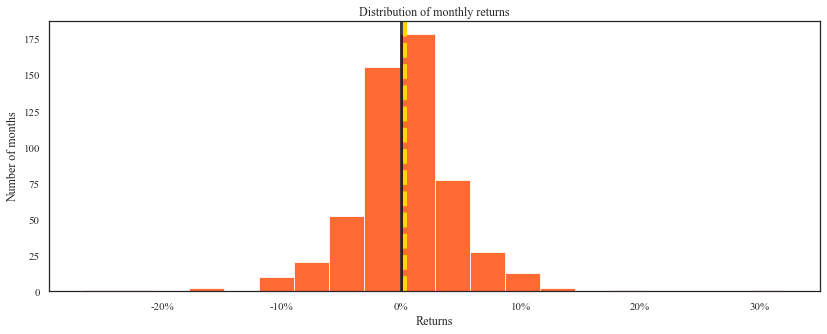

In [49]:
# Distribution of returns
# Note we use returns here, not excess returns

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_monthly_returns_dist(rnn_results_ret)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')
plt.tight_layout()
#plt.Color = 'g';
fig.set_size_inches(40,5)

No handles with labels found to put in legend.


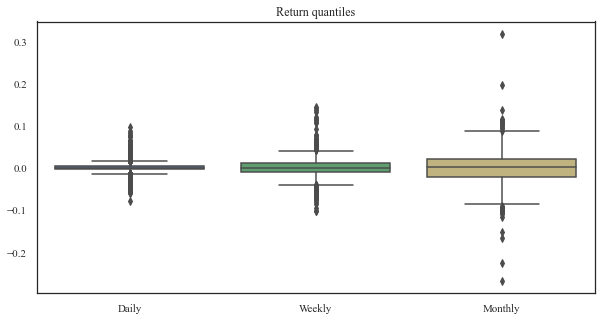

In [50]:
# Return quantiles
plt.figure(figsize=(10,5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')
pf.plot_return_quantiles(rnn_results);

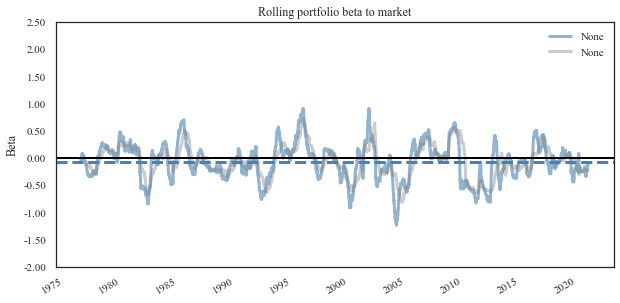

In [51]:
# Rolling beta
plt.figure(figsize=(10,5))
pf.plot_rolling_beta(rnn_results, market);
plt.ylim([-2, 2.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')

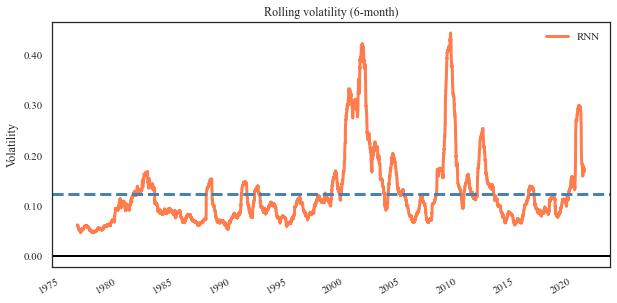

In [52]:
# Rolling volatility
plt.figure(figsize=(10,5))
pf.plot_rolling_volatility(rnn_results);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')

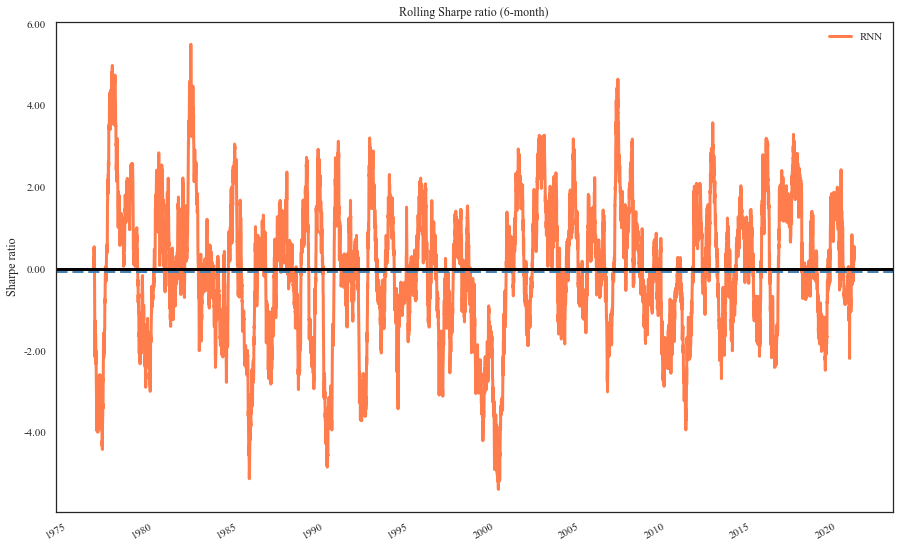

In [53]:
# Rolling sharpe ratio
plt.figure(figsize=(15,10))
pf.plot_rolling_sharpe(rnn_results);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')

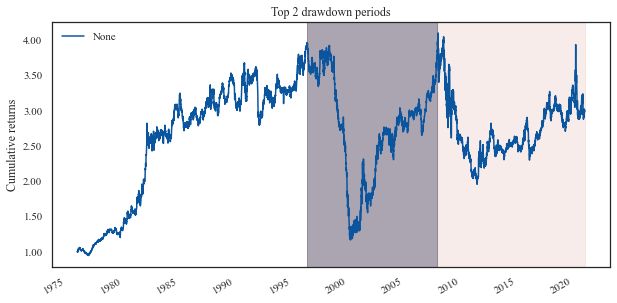

In [54]:
# Drawdown
# Note we use returns here, not excess returns

plt.figure(figsize=(10,5))
pf.plot_drawdown_periods(rnn_results_ret);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')

Text(0.5, 0, '')

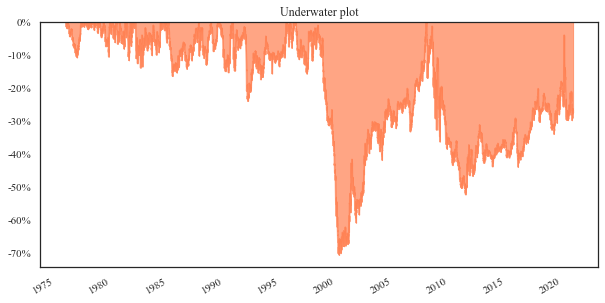

In [55]:
# Drawdown: Underwater plot
# Note we use returns here, not excess returns

plt.figure(figsize=(10,5))
pf.plot_drawdown_underwater(rnn_results_ret);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend("", edgecolor='white',facecolor='white')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel("")
plt.xlabel("")

In [56]:
print("The Annual Exc. Return of the RNN is: ", empyrical.annual_return(rnn_results)*100)
print('RNN T-stat excess returns:', stats.ttest_1samp(rnn_results, 0.0))
print("The Volatility of the RNN is: ", empyrical.annual_volatility(rnn_results)*100)
print("The alpha of the RNN is: ", empyrical.alpha(rnn_results,excess_market)*100)
print("The alpha of the RNN to MOM is: ", empyrical.alpha(rnn_results,mom_results)*100)
print("The Beta of the RNN is: ", empyrical.beta(rnn_results,excess_market))
print("The Sharpe of the RNN is: ", empyrical.sharpe_ratio(rnn_results))
print("The Sortino of the RNN is: ", empyrical.sortino_ratio(rnn_results))
print("MD of the RNN is: ", empyrical.max_drawdown(rnn_results_ret)*100)

The Annual Exc. Return of the RNN is:  -1.8404382239627814
RNN T-stat excess returns: Ttest_1sampResult(statistic=-0.39038791036827747, pvalue=0.6962570531881154)
The Volatility of the RNN is:  14.319126651698546
The alpha of the RNN is:  -0.3656858940734642
The alpha of the RNN to MOM is:  -1.0299581439954686
The Beta of the RNN is:  -0.05423095803724235
The Sharpe of the RNN is:  -0.05816995120372808
The Sortino of the RNN is:  -0.08197064296949204
MD of the RNN is:  -70.69771462936922


In [57]:
# Testing estimated alpha and beta
y=rnn_results
X=sm.add_constant(mom_results)
model = sm.OLS(y, X)
results = model.fit()
params = results.params

# Print beta, alpha and t-stats
print('Beta:', params[0])
print('Alpha:', params['const']*252)
print('')
print(results.t_test([2, 0]))

Beta: -4.1082446424525104e-05
Alpha: -0.010352776498980327

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0         -8.216e-05      0.000     -0.485      0.627      -0.000       0.000


In [58]:
rnn_monthly = empyrical.stats.aggregate_returns(rnn_results,'monthly')

In [59]:
rnn_monthly_df = pd.DataFrame()
rnn_monthly_df['ret'] = rnn_monthly

In [60]:
# NOTE: This is not excess returns
(rnn_monthly_df.sort_values('ret')*100).head(10)

ret
2000 2  -26.859621
1999 12 -22.581965
2009 1  -16.643366
2008 1  -15.213822
1992 1  -11.655509
1999 10 -10.965741
2020 4  -10.791803
1990 11 -10.453028
2011 10 -10.335925
2016 1  -10.087038

In [61]:
# NOTE: This is not based on excess returns
scipy.stats.skew(rnn_monthly_df)

array([0.10508546])

In [62]:
rnn_monthly_df['1+ret'] = rnn_monthly_df['ret']+1 
rnn_monthly_df['cum_ret'] = rnn_monthly_df['1+ret'].cumprod()